<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Politécnica_Salesiana_del_Ecuador.png" width="90%">
<h2>Práctica 3:
    Redes neuronales</h2>
<h3>Integrantes: Michelle Parraga, Andrés Alba </h3>

<h2>3.Diseñar un Modelo de Redes Neuronales (para el dataset HEPATITIS) con los siguientes pasos:
Dataset: https://archive.ics.uci.edu/ml/datasets/Hepatitis

<h3>3.1 Preparación de datos 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

print("Módulos y clases importados")

Módulos y clases importados


| Cantidad de variables | Cantidad de observaciones | Variable de salida |
|:-----------:|:-----------:|:-----------:|
| <center>19</center>   | <center>155</center> |<center><b>Class: Vivo/Muerto</b></center>  |




| Id | Variable | Descripción breve | Tipo | Técnica a aplicar | Función en Python  |
|-----------|-----------|-----------|-----------|-----------|-----------|
| 1 | EDAD | Años de edad | Numérica discreta| Estandarización| StandardScaler|
| 2 | SEXO| Masculino o Femenino | Categórica nominal | Sistema binario| OneHotEncoder|
| 3 | ESTEROIDES | Si usa o no | Categórica nominal | Sistema binario| OneHotEncoder |
| 4 | ANTIVIRALES | Si usa o no | Categórica nominal|Sistema binario| OneHotEncoder|
| 5 | FATIGA | Si tiene o no| Categórica nominal | Sistema binario| OneHotEncoder|
|6 | MALESTAR | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 7 | ANOREXIA | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 8| HÍGADO GRANDE | Si tiene o no | Categórica nominal| Sistema binario|OneHotEncoder|
| 9 | HÍGADO FIRME | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 10 | ESPÍLEO PALPABLE | Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 11| ARAÑAS | Si tiene o no| Categórica nominal |Sistema binario|OneHotEncoder|
| 12 |  ASCITIS | Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 13 | VARICES |Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 14 | BILIRRUBINA | niveles de bilirrubina en la sangre,</br> siendo un valor continuo. | Numérica Contínua | Estandarización| StandardScaler|
| 15 |  ALK FOSFATO | niveles de fosfato Alcalino en la sangre.</br>  | Numérica discreta | Estandarización| StandardScaler|
| 16 |SGOT | cantidad de la enzima SGOT en la sangre.  | Numérica discreta |Estandarización| StandardScaler|
| 17 | ALBÚMINA |cantidad de la Albumina en la sangre,</br> siendo un valor continuo. | Numérica Contínua  | Estandarización| StandardScaler|
| 18 | PROTIMA | El tiempo de protrombina es una </br> prueba para evaluar la</br> coagulación de la sangre. | Numérica discreta | Estandarización| StandardScaler|
| 19 | HISTOLOGÍA | Si es histolog@ o no | Categórica nominal| Sistema binario| OneHotEncoder|


<h5>c. Cargar el dataset</h5>

In [2]:
import pandas as pd  
import copy
print("Importaciones hechas")


Importaciones hechas


In [3]:
dfOriginal = pd.read_csv('DatasetHepatitisPreprocesado.csv', sep=';')
dataframe = copy.deepcopy(dfOriginal)
print(dataframe.shape)
print('dataset cargado')
# Eliminar la columna "class"
print('Separacion de Y ')
Y = dataframe['Class']
print(Y.shape)
# Eliminar la columna "Class"
print('Separacion de X ')
X_preprocesado = dataframe.drop('Class', axis=1)
print(X_preprocesado.shape)


(155, 41)
dataset cargado
Separacion de Y 
(155,)
Separacion de X 
(155, 40)


In [4]:
X_preprocesado.head(10)

,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,ASCITIS_2,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.323944,0.1250,0.288136,0.027778,0.625000,0.00
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.605634,0.1125,0.457627,0.064815,0.546875,0.00
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.000000,0.0875,0.325424,0.049383,0.625000,0.00
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.338028,0.0875,0.155932,0.080247,0.625000,0.80
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.380282,0.1250,0.000000,0.308642,0.625000,0.00
5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.380282,0.1125,0.322034,0.043210,0.625000,0.75
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.619718,0.0000,0.000000,0.000000,0.000000,0.00
7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.225352,0.1250,0.000000,0.000000,0.000000,0.00
8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.450704,0.0875,0.000000,0.074074,0.687500,0.00
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.323944,0.1250,0.000000,0.185185,0.609375,0.00


<h3>3. Estadística descriptiva </h3>

<h5>a. calcular las medidas descriptivas y generar conclusiones de la media y la desviación estándar de una variable que considere interesante </h5>

In [5]:
dataframe.describe() 

,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,Class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.896774,0.103226,0.006452,0.490323,0.503226,0.154839,0.845161,0.006452,0.645161,0.348387,...,0.032258,0.116129,0.851613,0.481690,0.171532,0.290235,0.129132,0.534879,0.351161,0.793548
std,0.305240,0.305240,0.080322,0.501527,0.501610,0.362923,0.362923,0.080322,0.480015,0.478004,...,0.177257,0.321418,0.356636,0.176984,0.152499,0.210379,0.138160,0.205991,0.352219,0.406070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.352113,0.087500,0.172881,0.047068,0.476562,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.450704,0.125000,0.284746,0.084877,0.609375,0.350000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.605634,0.187500,0.405085,0.152778,0.656250,0.650000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h5>b. Calcular las correlaciones entre todas las variables</h5>

In [6]:
cr=dataframe.corr()
cr.head(41)

,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,Class
SEXO_1,1.000000,-1.000000,0.027340,-0.048985,0.044599,-0.089249,0.089249,0.027340,-0.074340,0.070059,...,-0.058072,0.056792,-0.022321,-0.008126,0.039341,-0.162851,0.008991,0.018906,-0.067128,-0.173051
SEXO_2,-1.000000,1.000000,-0.027340,0.048985,-0.044599,0.089249,-0.089249,-0.027340,0.074340,-0.070059,...,0.058072,-0.056792,0.022321,0.008126,-0.039341,0.162851,-0.008991,-0.018906,0.067128,0.173051
ESTEROIDES_0,0.027340,-0.027340,1.000000,-0.079037,-0.081104,0.188265,-0.188265,-0.006494,-0.108657,0.110206,...,-0.014712,-0.029209,0.033637,-0.065622,-0.044548,-0.051609,-0.028605,0.035369,0.103020,0.041102
ESTEROIDES_1,-0.048985,0.048985,-0.079037,1.000000,-0.987177,0.043961,-0.043961,0.082157,0.160968,-0.175451,...,0.040056,-0.073548,0.046376,0.090466,0.020253,0.059860,0.030734,-0.219649,-0.066839,-0.137413
ESTEROIDES_2,0.044599,-0.044599,-0.081104,-0.987177,1.000000,-0.074101,0.074101,-0.081104,-0.143542,0.157775,...,-0.037694,0.078213,-0.051755,-0.079943,-0.013117,-0.051586,-0.026149,0.213949,0.050331,0.130809
ANTIVIRALES_1,-0.089249,0.089249,0.188265,0.043961,-0.074101,1.000000,-1.000000,-0.034491,-0.055310,0.061339,...,-0.078146,-0.155148,0.178668,0.013100,-0.177958,-0.041764,-0.095980,0.153939,0.276452,0.130196
ANTIVIRALES_2,0.089249,-0.089249,-0.188265,-0.043961,0.074101,-1.000000,1.000000,0.034491,0.055310,-0.061339,...,0.078146,0.155148,-0.178668,-0.013100,0.177958,0.041764,0.095980,-0.153939,-0.276452,-0.130196
FATIGA_0,0.027340,-0.027340,-0.006494,0.082157,-0.081104,-0.034491,0.034491,1.000000,-0.108657,-0.058922,...,0.441367,-0.029209,-0.193047,-0.046322,-0.090933,-0.111530,-0.075561,-0.209919,-0.080601,0.041102
FATIGA_1,-0.074340,0.074340,-0.108657,0.160968,-0.143542,-0.055310,0.055310,-0.108657,1.000000,-0.985950,...,-0.017233,0.184642,-0.157844,0.285284,0.279140,0.149979,0.204176,-0.132600,-0.048244,-0.311644
FATIGA_2,0.070059,-0.070059,0.110206,-0.175451,0.157775,0.061339,-0.061339,-0.058922,-0.985950,1.000000,...,-0.056860,-0.180511,0.190947,-0.278701,-0.265035,-0.131869,-0.192338,0.168432,0.061991,0.306049


<h3>3.2 Desarrollo y entrenamiento de una Red Neuronal (arquitectura de 4 capas - L1:256, L2:128, L3:64, L4:1). Guardar 
el modelo en un archivo h5

In [7]:
#Modelo secuencial quiere decir que agregaremos capas y se conectarán de manera secuencial.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from tensorflow.keras import layers
#json:  {l1:'8',l2:'1'}
from sklearn.model_selection import train_test_split
from keras.models import load_model

from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print('Librerías importadas')

def guardarRNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")   
    
def cargarRNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')    
    print("Red Neuronal Cargada desde Archivo") 
    return model
print('Funciones definidas')


def calculoErrores():


    MAE=metrics.mean_absolute_error(y_test, y_pred)
    MSE=metrics.mean_squared_error(y_test, y_pred)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    MAE=str(round(MAE, 4))
    MSE=str(round(MSE, 4))
    RMSE=str(round(RMSE, 4))

    print('Mean Absolute Error (MAE):', MAE)  
    print('Mean Squared Error (MSE):', MSE)  
    print('Root Mean Squared Error (RMSE):', RMSE) 

    y_testBinario = (y_test >= 0.5).astype("int32")
    y_predBinario = (y_pred >= 0.5).astype("int32")

    #y_pred=y_pred.flatten()# de 2D a 1D

    accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
    print('Accuracy: ' + accuracyModeloBase) 

    precision=precision_score(y_testBinario, y_predBinario)
    precision=str(round(precision, 4))
    print('Precision: ',precision)

    recall=recall_score(y_testBinario, y_predBinario)
    recall=str(round(recall, 4))
    print('Recall: ',recall)

    f1=f1_score(y_testBinario, y_predBinario)
    f1=str(round(f1, 4))
    print('F1:',f1)
    
    return accuracyModeloBase, precision, recall, f1


Librerías importadas
Funciones definidas


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocesado, Y, test_size=.5)

#Construcción del Modelo o Arquitectura de Redes Neoronales
model = Sequential()

#La primera capa Dense recibe el numero de variables, que es la segunda dimensión de la matriz X, esto es X_train.shape[1]
#La primera capa tiene 3 neuronas. La función de activación es la función sigmoide.


model.add(Dense(256, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


#Como tenemos dos posibles salidas "0 o 1", vamos a escoger que el error lo trate como una clasificación binaria, 
#el optimizador será nuestra función derivada que nos ayudará a determinar hacia donde mover los pesos.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


#Entrenamiento: 

history = model.fit(X_train, y_train, epochs=20000, batch_size=X_train.shape[0], verbose=2)
#history = model.fit(X_train, y_train, epochs=10000, batch_size=X_train.shape[0], verbose=2, validation_split=0.2)

score = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#Fase de Testing
score = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#mostrar pesos de la red
#print(model.get_weights())

#Guardar pesos y la arquitectura de la red en un archivo 

guardarRNN(model,'RNNHepatitis')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 54,273
Trainable params: 54,273
Non-traina

Epoch 86/20000
1/1 - 0s - loss: 0.4749 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 87/20000
1/1 - 0s - loss: 0.4748 - accuracy: 0.8182 - 31ms/epoch - 31ms/step
Epoch 88/20000
1/1 - 0s - loss: 0.4748 - accuracy: 0.8182 - 9ms/epoch - 9ms/step
Epoch 89/20000
1/1 - 0s - loss: 0.4747 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 90/20000
1/1 - 0s - loss: 0.4746 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 91/20000
1/1 - 0s - loss: 0.4746 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 92/20000
1/1 - 0s - loss: 0.4746 - accuracy: 0.8182 - 10ms/epoch - 10ms/step
Epoch 93/20000
1/1 - 0s - loss: 0.4745 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 94/20000
1/1 - 0s - loss: 0.4745 - accuracy: 0.8182 - 11ms/epoch - 11ms/step
Epoch 95/20000
1/1 - 0s - loss: 0.4744 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 96/20000
1/1 - 0s - loss: 0.4744 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 97/20000
1/1 - 0s - loss: 0.4744 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 

Epoch 184/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 11ms/epoch - 11ms/step
Epoch 185/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 9ms/epoch - 9ms/step
Epoch 186/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 187/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 188/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 10ms/epoch - 10ms/step
Epoch 189/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 190/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 15ms/epoch - 15ms/step
Epoch 191/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 192/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 193/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 14ms/epoch - 14ms/step
Epoch 194/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 195/20000
1/1 - 0s - loss: 0.4741 - accuracy: 0.8182 - 12ms/epoch - 12ms

Epoch 282/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 283/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 284/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 285/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 14ms/epoch - 14ms/step
Epoch 286/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 15ms/epoch - 15ms/step
Epoch 287/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 288/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 289/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 15ms/epoch - 15ms/step
Epoch 290/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 291/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 15ms/epoch - 15ms/step
Epoch 292/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 293/20000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8182 - 12ms/epoch - 12

Epoch 380/20000
1/1 - 0s - loss: 0.4716 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 381/20000
1/1 - 0s - loss: 0.4714 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 382/20000
1/1 - 0s - loss: 0.4713 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 383/20000
1/1 - 0s - loss: 0.4712 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 384/20000
1/1 - 0s - loss: 0.4710 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 385/20000
1/1 - 0s - loss: 0.4708 - accuracy: 0.8182 - 11ms/epoch - 11ms/step
Epoch 386/20000
1/1 - 0s - loss: 0.4707 - accuracy: 0.8182 - 11ms/epoch - 11ms/step
Epoch 387/20000
1/1 - 0s - loss: 0.4705 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 388/20000
1/1 - 0s - loss: 0.4703 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 389/20000
1/1 - 0s - loss: 0.4700 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 390/20000
1/1 - 0s - loss: 0.4698 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 391/20000
1/1 - 0s - loss: 0.4696 - accuracy: 0.8182 - 12ms/epoch - 12

Epoch 478/20000
1/1 - 0s - loss: 0.2447 - accuracy: 0.9481 - 13ms/epoch - 13ms/step
Epoch 479/20000
1/1 - 0s - loss: 0.2427 - accuracy: 0.9481 - 31ms/epoch - 31ms/step
Epoch 480/20000
1/1 - 0s - loss: 0.2408 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 481/20000
1/1 - 0s - loss: 0.2389 - accuracy: 0.9481 - 9ms/epoch - 9ms/step
Epoch 482/20000
1/1 - 0s - loss: 0.2372 - accuracy: 0.9481 - 11ms/epoch - 11ms/step
Epoch 483/20000
1/1 - 0s - loss: 0.2355 - accuracy: 0.9481 - 11ms/epoch - 11ms/step
Epoch 484/20000
1/1 - 0s - loss: 0.2339 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 485/20000
1/1 - 0s - loss: 0.2323 - accuracy: 0.9481 - 10ms/epoch - 10ms/step
Epoch 486/20000
1/1 - 0s - loss: 0.2309 - accuracy: 0.9481 - 10ms/epoch - 10ms/step
Epoch 487/20000
1/1 - 0s - loss: 0.2295 - accuracy: 0.9481 - 13ms/epoch - 13ms/step
Epoch 488/20000
1/1 - 0s - loss: 0.2281 - accuracy: 0.9481 - 10ms/epoch - 10ms/step
Epoch 489/20000
1/1 - 0s - loss: 0.2268 - accuracy: 0.9481 - 13ms/epoch - 13ms

Epoch 576/20000
1/1 - 0s - loss: 0.1944 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 577/20000
1/1 - 0s - loss: 0.1943 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 578/20000
1/1 - 0s - loss: 0.1942 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 579/20000
1/1 - 0s - loss: 0.1941 - accuracy: 0.9481 - 13ms/epoch - 13ms/step
Epoch 580/20000
1/1 - 0s - loss: 0.1940 - accuracy: 0.9481 - 11ms/epoch - 11ms/step
Epoch 581/20000
1/1 - 0s - loss: 0.1939 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 582/20000
1/1 - 0s - loss: 0.1939 - accuracy: 0.9481 - 11ms/epoch - 11ms/step
Epoch 583/20000
1/1 - 0s - loss: 0.1938 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 584/20000
1/1 - 0s - loss: 0.1937 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 585/20000
1/1 - 0s - loss: 0.1937 - accuracy: 0.9481 - 11ms/epoch - 11ms/step
Epoch 586/20000
1/1 - 0s - loss: 0.1936 - accuracy: 0.9481 - 12ms/epoch - 12ms/step
Epoch 587/20000
1/1 - 0s - loss: 0.1935 - accuracy: 0.9481 - 11ms/epoch - 11

Epoch 674/20000
1/1 - 0s - loss: 0.1884 - accuracy: 0.9481 - 16ms/epoch - 16ms/step
Epoch 675/20000
1/1 - 0s - loss: 0.1764 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 676/20000
1/1 - 0s - loss: 0.1784 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 677/20000
1/1 - 0s - loss: 0.1715 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 678/20000
1/1 - 0s - loss: 0.1686 - accuracy: 0.9610 - 11ms/epoch - 11ms/step
Epoch 679/20000
1/1 - 0s - loss: 0.1682 - accuracy: 0.9610 - 10ms/epoch - 10ms/step
Epoch 680/20000
1/1 - 0s - loss: 0.1690 - accuracy: 0.9610 - 11ms/epoch - 11ms/step
Epoch 681/20000
1/1 - 0s - loss: 0.1686 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 682/20000
1/1 - 0s - loss: 0.1676 - accuracy: 0.9610 - 11ms/epoch - 11ms/step
Epoch 683/20000
1/1 - 0s - loss: 0.1673 - accuracy: 0.9610 - 13ms/epoch - 13ms/step
Epoch 684/20000
1/1 - 0s - loss: 0.1672 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 685/20000
1/1 - 0s - loss: 0.1672 - accuracy: 0.9610 - 11ms/epoch - 11

Epoch 772/20000
1/1 - 0s - loss: 0.1626 - accuracy: 0.9610 - 10ms/epoch - 10ms/step
Epoch 773/20000
1/1 - 0s - loss: 0.1626 - accuracy: 0.9610 - 11ms/epoch - 11ms/step
Epoch 774/20000
1/1 - 0s - loss: 0.1626 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 775/20000
1/1 - 0s - loss: 0.1626 - accuracy: 0.9610 - 13ms/epoch - 13ms/step
Epoch 776/20000
1/1 - 0s - loss: 0.1625 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 777/20000
1/1 - 0s - loss: 0.1625 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 778/20000
1/1 - 0s - loss: 0.1625 - accuracy: 0.9610 - 13ms/epoch - 13ms/step
Epoch 779/20000
1/1 - 0s - loss: 0.1625 - accuracy: 0.9610 - 13ms/epoch - 13ms/step
Epoch 780/20000
1/1 - 0s - loss: 0.1625 - accuracy: 0.9610 - 13ms/epoch - 13ms/step
Epoch 781/20000
1/1 - 0s - loss: 0.1625 - accuracy: 0.9610 - 12ms/epoch - 12ms/step
Epoch 782/20000
1/1 - 0s - loss: 0.1624 - accuracy: 0.9610 - 14ms/epoch - 14ms/step
Epoch 783/20000
1/1 - 0s - loss: 0.1624 - accuracy: 0.9610 - 12ms/epoch - 12

Epoch 870/20000
1/1 - 0s - loss: 0.1194 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 871/20000
1/1 - 0s - loss: 0.1192 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 872/20000
1/1 - 0s - loss: 0.1192 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 873/20000
1/1 - 0s - loss: 0.1194 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 874/20000
1/1 - 0s - loss: 0.1198 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 875/20000
1/1 - 0s - loss: 0.1197 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 876/20000
1/1 - 0s - loss: 0.1191 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 877/20000
1/1 - 0s - loss: 0.1188 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 878/20000
1/1 - 0s - loss: 0.1186 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 879/20000
1/1 - 0s - loss: 0.1186 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 880/20000
1/1 - 0s - loss: 0.1186 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 881/20000
1/1 - 0s - loss: 0.1187 - accuracy: 0.9740 - 12ms/epoch - 12

Epoch 968/20000
1/1 - 0s - loss: 0.1152 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 969/20000
1/1 - 0s - loss: 0.1152 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 970/20000
1/1 - 0s - loss: 0.1152 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 971/20000
1/1 - 0s - loss: 0.1152 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 972/20000
1/1 - 0s - loss: 0.1152 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 973/20000
1/1 - 0s - loss: 0.1152 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 974/20000
1/1 - 0s - loss: 0.1151 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 975/20000
1/1 - 0s - loss: 0.1151 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 976/20000
1/1 - 0s - loss: 0.1151 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 977/20000
1/1 - 0s - loss: 0.1151 - accuracy: 0.9740 - 34ms/epoch - 34ms/step
Epoch 978/20000
1/1 - 0s - loss: 0.1151 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 979/20000
1/1 - 0s - loss: 0.1151 - accuracy: 0.9740 - 11ms/epoch - 11

Epoch 1065/20000
1/1 - 0s - loss: 0.1142 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1066/20000
1/1 - 0s - loss: 0.1142 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1067/20000
1/1 - 0s - loss: 0.1142 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1068/20000
1/1 - 0s - loss: 0.1142 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1069/20000
1/1 - 0s - loss: 0.1142 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1070/20000
1/1 - 0s - loss: 0.1142 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1071/20000
1/1 - 0s - loss: 0.1142 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1072/20000
1/1 - 0s - loss: 0.1142 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1073/20000
1/1 - 0s - loss: 0.1141 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1074/20000
1/1 - 0s - loss: 0.1141 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1075/20000
1/1 - 0s - loss: 0.1141 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1076/20000
1/1 - 0s - loss: 0.1141 - accuracy: 0.9740 - 10ms/ep

Epoch 1162/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1163/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1164/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1165/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1166/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1167/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1168/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1169/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1170/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1171/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1172/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1173/20000
1/1 - 0s - loss: 0.1138 - accuracy: 0.9740 - 12m

Epoch 1259/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1260/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1261/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1262/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1263/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1264/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1265/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1266/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1267/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1268/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1269/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1270/20000
1/1 - 0s - loss: 0.1137 - accuracy: 0.9740 - 12ms/

Epoch 1356/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1357/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1358/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1359/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1360/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1361/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1362/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1363/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1364/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1365/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1366/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1367/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/

Epoch 1453/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1454/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1455/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1456/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1457/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1458/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1459/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1460/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1461/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1462/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1463/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1464/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/

Epoch 1550/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1551/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1552/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1553/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1554/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1555/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1556/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1557/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1558/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1559/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1560/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1561/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/

Epoch 1647/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1648/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1649/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1650/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1651/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1652/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1653/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1654/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1655/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1656/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1657/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1658/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/

Epoch 1744/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1745/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1746/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1747/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1748/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1749/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1750/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1751/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1752/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1753/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1754/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 15ms/epoch - 15ms/step
Epoch 1755/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14m

Epoch 1841/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 1842/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 8ms/epoch - 8ms/step
Epoch 1843/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1844/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1845/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1846/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1847/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1848/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1849/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 1850/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1851/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1852/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoc

Epoch 1938/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1939/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1940/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1941/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1942/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 1943/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1944/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1945/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 1946/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 1947/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 16ms/epoch - 16ms/step
Epoch 1948/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 1949/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11m

Epoch 2035/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 8ms/epoch - 8ms/step
Epoch 2036/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2037/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 2038/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2039/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2040/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2041/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2042/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2043/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2044/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2045/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2046/20000
1/1 - 0s - loss: 0.1136 - accuracy: 0.9740 - 10ms/ep

Epoch 2132/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2133/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2134/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2135/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 2136/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2137/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2138/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2139/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2140/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2141/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2142/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2143/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/

Epoch 2229/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2230/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2231/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2232/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2233/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2234/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2235/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2236/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2237/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2238/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2239/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2240/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11m

Epoch 2326/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2327/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2328/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2329/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2330/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2331/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2332/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2333/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2334/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2335/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2336/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2337/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11m

Epoch 2423/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2424/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2425/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2426/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2427/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2428/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2429/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2430/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2431/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2432/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2433/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2434/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13m

Epoch 2520/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2521/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2522/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2523/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2524/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2525/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2526/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2527/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2528/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2529/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2530/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2531/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12m

Epoch 2617/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2618/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2619/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2620/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2621/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2622/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2623/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2624/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2625/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2626/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2627/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2628/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12m

Epoch 2714/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 2715/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2716/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2717/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2718/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 28ms/epoch - 28ms/step
Epoch 2719/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2720/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2721/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2722/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2723/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2724/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2725/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/

Epoch 2811/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 2812/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2813/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2814/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2815/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2816/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2817/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2818/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2819/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2820/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2821/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2822/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/

Epoch 2908/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 2909/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2910/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 2911/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 2912/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2913/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2914/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 2915/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2916/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2917/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 2918/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 2919/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13m

Epoch 3005/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3006/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3007/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 3008/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3009/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3010/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3011/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3012/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3013/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 3014/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3015/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3016/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/

Epoch 3102/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3103/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3104/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3105/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3106/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3107/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3108/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3109/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3110/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3111/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3112/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3113/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11m

Epoch 3199/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3200/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3201/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3202/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3203/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3204/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3205/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3206/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 3207/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 3208/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3209/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3210/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11m

Epoch 3296/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3297/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3298/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3299/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3300/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 3301/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3302/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3303/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3304/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3305/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3306/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3307/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 14m

Epoch 3393/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3394/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3395/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3396/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3397/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3398/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3399/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3400/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3401/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3402/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3403/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3404/20000
1/1 - 0s - loss: 0.1135 - accuracy: 0.9740 - 14m

Epoch 3490/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3491/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3492/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 3493/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3494/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3495/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3496/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3497/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3498/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3499/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 3500/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3501/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 12ms/

Epoch 3587/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3588/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 8ms/epoch - 8ms/step
Epoch 3589/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 3590/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3591/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3592/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3593/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3594/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3595/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3596/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3597/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 9ms/epoch - 9ms/step
Epoch 3598/20000
1/1 - 0s - loss: 0.1134 - accuracy: 0.9740 - 11ms/epoc

Epoch 3684/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3685/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3686/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3687/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3688/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3689/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3690/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3691/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3692/20000
1/1 - 0s - loss: 0.1133 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3693/20000
1/1 - 0s - loss: 0.1132 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3694/20000
1/1 - 0s - loss: 0.1132 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3695/20000
1/1 - 0s - loss: 0.1132 - accuracy: 0.9740 - 12m

Epoch 3781/20000
1/1 - 0s - loss: 0.1127 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3782/20000
1/1 - 0s - loss: 0.1126 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3783/20000
1/1 - 0s - loss: 0.1126 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3784/20000
1/1 - 0s - loss: 0.1126 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3785/20000
1/1 - 0s - loss: 0.1126 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3786/20000
1/1 - 0s - loss: 0.1126 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3787/20000
1/1 - 0s - loss: 0.1126 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3788/20000
1/1 - 0s - loss: 0.1125 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3789/20000
1/1 - 0s - loss: 0.1125 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3790/20000
1/1 - 0s - loss: 0.1125 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3791/20000
1/1 - 0s - loss: 0.1125 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3792/20000
1/1 - 0s - loss: 0.1125 - accuracy: 0.9740 - 13m

Epoch 3878/20000
1/1 - 0s - loss: 0.1020 - accuracy: 0.9740 - 10ms/epoch - 10ms/step
Epoch 3879/20000
1/1 - 0s - loss: 0.1017 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3880/20000
1/1 - 0s - loss: 0.1014 - accuracy: 0.9740 - 14ms/epoch - 14ms/step
Epoch 3881/20000
1/1 - 0s - loss: 0.1011 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3882/20000
1/1 - 0s - loss: 0.1008 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3883/20000
1/1 - 0s - loss: 0.1005 - accuracy: 0.9740 - 12ms/epoch - 12ms/step
Epoch 3884/20000
1/1 - 0s - loss: 0.1002 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3885/20000
1/1 - 0s - loss: 0.0999 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3886/20000
1/1 - 0s - loss: 0.0996 - accuracy: 0.9740 - 11ms/epoch - 11ms/step
Epoch 3887/20000
1/1 - 0s - loss: 0.0993 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3888/20000
1/1 - 0s - loss: 0.0990 - accuracy: 0.9740 - 13ms/epoch - 13ms/step
Epoch 3889/20000
1/1 - 0s - loss: 0.0987 - accuracy: 0.9740 - 13m

Epoch 3975/20000
1/1 - 0s - loss: 0.0730 - accuracy: 0.9870 - 11ms/epoch - 11ms/step
Epoch 3976/20000
1/1 - 0s - loss: 0.0730 - accuracy: 0.9870 - 13ms/epoch - 13ms/step
Epoch 3977/20000
1/1 - 0s - loss: 0.0729 - accuracy: 0.9870 - 12ms/epoch - 12ms/step
Epoch 3978/20000
1/1 - 0s - loss: 0.0728 - accuracy: 0.9870 - 13ms/epoch - 13ms/step
Epoch 3979/20000
1/1 - 0s - loss: 0.0727 - accuracy: 0.9870 - 14ms/epoch - 14ms/step
Epoch 3980/20000
1/1 - 0s - loss: 0.0727 - accuracy: 0.9870 - 13ms/epoch - 13ms/step
Epoch 3981/20000
1/1 - 0s - loss: 0.0726 - accuracy: 0.9870 - 13ms/epoch - 13ms/step
Epoch 3982/20000
1/1 - 0s - loss: 0.0725 - accuracy: 0.9870 - 11ms/epoch - 11ms/step
Epoch 3983/20000
1/1 - 0s - loss: 0.0725 - accuracy: 0.9870 - 11ms/epoch - 11ms/step
Epoch 3984/20000
1/1 - 0s - loss: 0.0724 - accuracy: 0.9870 - 10ms/epoch - 10ms/step
Epoch 3985/20000
1/1 - 0s - loss: 0.0723 - accuracy: 0.9870 - 13ms/epoch - 13ms/step
Epoch 3986/20000
1/1 - 0s - loss: 0.0723 - accuracy: 0.9870 - 13m

Epoch 4072/20000
1/1 - 0s - loss: 0.0691 - accuracy: 0.9870 - 12ms/epoch - 12ms/step
Epoch 4073/20000
1/1 - 0s - loss: 0.0690 - accuracy: 0.9870 - 16ms/epoch - 16ms/step
Epoch 4074/20000
1/1 - 0s - loss: 0.0690 - accuracy: 0.9870 - 11ms/epoch - 11ms/step
Epoch 4075/20000
1/1 - 0s - loss: 0.0689 - accuracy: 0.9870 - 13ms/epoch - 13ms/step
Epoch 4076/20000
1/1 - 0s - loss: 0.0689 - accuracy: 0.9870 - 13ms/epoch - 13ms/step
Epoch 4077/20000
1/1 - 0s - loss: 0.0688 - accuracy: 0.9870 - 11ms/epoch - 11ms/step
Epoch 4078/20000
1/1 - 0s - loss: 0.0688 - accuracy: 0.9870 - 9ms/epoch - 9ms/step
Epoch 4079/20000
1/1 - 0s - loss: 0.0687 - accuracy: 0.9870 - 10ms/epoch - 10ms/step
Epoch 4080/20000
1/1 - 0s - loss: 0.0687 - accuracy: 0.9870 - 12ms/epoch - 12ms/step
Epoch 4081/20000
1/1 - 0s - loss: 0.0686 - accuracy: 0.9870 - 14ms/epoch - 14ms/step
Epoch 4082/20000
1/1 - 0s - loss: 0.0685 - accuracy: 0.9870 - 14ms/epoch - 14ms/step
Epoch 4083/20000
1/1 - 0s - loss: 0.0685 - accuracy: 0.9870 - 11ms/

Epoch 4169/20000
1/1 - 0s - loss: 0.0109 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4170/20000
1/1 - 0s - loss: 0.0106 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4171/20000
1/1 - 0s - loss: 0.0104 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4172/20000
1/1 - 0s - loss: 0.0102 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4173/20000
1/1 - 0s - loss: 0.0100 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4174/20000
1/1 - 0s - loss: 0.0098 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4175/20000
1/1 - 0s - loss: 0.0097 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4176/20000
1/1 - 0s - loss: 0.0095 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4177/20000
1/1 - 0s - loss: 0.0093 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4178/20000
1/1 - 0s - loss: 0.0092 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4179/20000
1/1 - 0s - loss: 0.0091 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4180/20000
1/1 - 0s - loss: 0.0089 - accuracy: 1.0000 - 15m

Epoch 4266/20000
1/1 - 0s - loss: 0.0044 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4267/20000
1/1 - 0s - loss: 0.0044 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4268/20000
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4269/20000
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4270/20000
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4271/20000
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4272/20000
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4273/20000
1/1 - 0s - loss: 0.0042 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4274/20000
1/1 - 0s - loss: 0.0042 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4275/20000
1/1 - 0s - loss: 0.0042 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4276/20000
1/1 - 0s - loss: 0.0042 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 4277/20000
1/1 - 0s - loss: 0.0041 - accuracy: 1.0000 - 13m

Epoch 4363/20000
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4364/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4365/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 4366/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4367/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 20ms/epoch - 20ms/step
Epoch 4368/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 17ms/epoch - 17ms/step
Epoch 4369/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 21ms/epoch - 21ms/step
Epoch 4370/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4371/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4372/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4373/20000
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - 20ms/epoch - 20ms/step
Epoch 4374/20000
1/1 - 0s - loss: 0.0027 - accuracy: 1.0000 - 19ms/

Epoch 4460/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 19ms/epoch - 19ms/step
Epoch 4461/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4462/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4463/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4464/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4465/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4466/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4467/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4468/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 4469/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4470/20000
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 4471/20000
1/1 - 0s - loss: 0.0020 - accuracy: 1.0000 - 10ms/

Epoch 4557/20000
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4558/20000
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 4559/20000
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 4560/20000
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4561/20000
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4562/20000
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4563/20000
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4564/20000
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4565/20000
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - 22ms/epoch - 22ms/step
Epoch 4566/20000
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - 20ms/epoch - 20ms/step
Epoch 4567/20000
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - 19ms/epoch - 19ms/step
Epoch 4568/20000
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - 20ms/ep

Epoch 4654/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4655/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4656/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 4657/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4658/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4659/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 20ms/epoch - 20ms/step
Epoch 4660/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 4661/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4662/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4663/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4664/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 4665/20000
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000 - 13ms/ep

Epoch 4751/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4752/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4753/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 4754/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4755/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 18ms/epoch - 18ms/step
Epoch 4756/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 4757/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 4758/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4759/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 4760/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 4761/20000
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4762/20000
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - 7ms/epoch -

Epoch 4849/20000
1/1 - 0s - loss: 0.0010 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4850/20000
1/1 - 0s - loss: 0.0010 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4851/20000
1/1 - 0s - loss: 0.0010 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4852/20000
1/1 - 0s - loss: 0.0010 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4853/20000
1/1 - 0s - loss: 0.0010 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4854/20000
1/1 - 0s - loss: 0.0010 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 4855/20000
1/1 - 0s - loss: 9.9900e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4856/20000
1/1 - 0s - loss: 9.9758e-04 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 4857/20000
1/1 - 0s - loss: 9.9615e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 4858/20000
1/1 - 0s - loss: 9.9473e-04 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 4859/20000
1/1 - 0s - loss: 9.9331e-04 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 4860/20000
1/1 - 0s - loss: 9.9190e-04 - accura

Epoch 4942/20000
1/1 - 0s - loss: 8.8660e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 4943/20000
1/1 - 0s - loss: 8.8543e-04 - accuracy: 1.0000 - 16ms/epoch - 16ms/step
Epoch 4944/20000
1/1 - 0s - loss: 8.8426e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4945/20000
1/1 - 0s - loss: 8.8310e-04 - accuracy: 1.0000 - 19ms/epoch - 19ms/step
Epoch 4946/20000
1/1 - 0s - loss: 8.8194e-04 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 4947/20000
1/1 - 0s - loss: 8.8079e-04 - accuracy: 1.0000 - 23ms/epoch - 23ms/step
Epoch 4948/20000
1/1 - 0s - loss: 8.7963e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 4949/20000
1/1 - 0s - loss: 8.7848e-04 - accuracy: 1.0000 - 6ms/epoch - 6ms/step
Epoch 4950/20000
1/1 - 0s - loss: 8.7733e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 4951/20000
1/1 - 0s - loss: 8.7618e-04 - accuracy: 1.0000 - 17ms/epoch - 17ms/step
Epoch 4952/20000
1/1 - 0s - loss: 8.7504e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 4953/20000
1/1 - 0s -

Epoch 5035/20000
1/1 - 0s - loss: 7.8803e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5036/20000
1/1 - 0s - loss: 7.8707e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5037/20000
1/1 - 0s - loss: 7.8611e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5038/20000
1/1 - 0s - loss: 7.8515e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5039/20000
1/1 - 0s - loss: 7.8420e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5040/20000
1/1 - 0s - loss: 7.8325e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5041/20000
1/1 - 0s - loss: 7.8230e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5042/20000
1/1 - 0s - loss: 7.8135e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5043/20000
1/1 - 0s - loss: 7.8040e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5044/20000
1/1 - 0s - loss: 7.7945e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5045/20000
1/1 - 0s - loss: 7.7851e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5046/20000
1/1 - 0s -

Epoch 5128/20000
1/1 - 0s - loss: 7.0620e-04 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 5129/20000
1/1 - 0s - loss: 7.0540e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5130/20000
1/1 - 0s - loss: 7.0460e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5131/20000
1/1 - 0s - loss: 7.0380e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5132/20000
1/1 - 0s - loss: 7.0300e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5133/20000
1/1 - 0s - loss: 7.0220e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5134/20000
1/1 - 0s - loss: 7.0140e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5135/20000
1/1 - 0s - loss: 7.0060e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5136/20000
1/1 - 0s - loss: 6.9981e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5137/20000
1/1 - 0s - loss: 6.9902e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5138/20000
1/1 - 0s - loss: 6.9823e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5139/20000
1/1 - 

Epoch 5221/20000
1/1 - 0s - loss: 6.3719e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5222/20000
1/1 - 0s - loss: 6.3651e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5223/20000
1/1 - 0s - loss: 6.3583e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5224/20000
1/1 - 0s - loss: 6.3515e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5225/20000
1/1 - 0s - loss: 6.3447e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5226/20000
1/1 - 0s - loss: 6.3379e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5227/20000
1/1 - 0s - loss: 6.3311e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5228/20000
1/1 - 0s - loss: 6.3244e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5229/20000
1/1 - 0s - loss: 6.3176e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5230/20000
1/1 - 0s - loss: 6.3109e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5231/20000
1/1 - 0s - loss: 6.3041e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5232/20000
1/1 

Epoch 5314/20000
1/1 - 0s - loss: 5.7823e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5315/20000
1/1 - 0s - loss: 5.7764e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5316/20000
1/1 - 0s - loss: 5.7705e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5317/20000
1/1 - 0s - loss: 5.7647e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5318/20000
1/1 - 0s - loss: 5.7588e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5319/20000
1/1 - 0s - loss: 5.7530e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5320/20000
1/1 - 0s - loss: 5.7472e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5321/20000
1/1 - 0s - loss: 5.7413e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5322/20000
1/1 - 0s - loss: 5.7355e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5323/20000
1/1 - 0s - loss: 5.7297e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5324/20000
1/1 - 0s - loss: 5.7239e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5325/20000
1/1 

Epoch 5407/20000
1/1 - 0s - loss: 5.2728e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5408/20000
1/1 - 0s - loss: 5.2677e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5409/20000
1/1 - 0s - loss: 5.2626e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5410/20000
1/1 - 0s - loss: 5.2575e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5411/20000
1/1 - 0s - loss: 5.2525e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5412/20000
1/1 - 0s - loss: 5.2474e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5413/20000
1/1 - 0s - loss: 5.2423e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5414/20000
1/1 - 0s - loss: 5.2373e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5415/20000
1/1 - 0s - loss: 5.2322e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5416/20000
1/1 - 0s - loss: 5.2272e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5417/20000
1/1 - 0s - loss: 5.2221e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5418/20000
1/1 

Epoch 5500/20000
1/1 - 0s - loss: 4.8285e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5501/20000
1/1 - 0s - loss: 4.8240e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5502/20000
1/1 - 0s - loss: 4.8196e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5503/20000
1/1 - 0s - loss: 4.8151e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5504/20000
1/1 - 0s - loss: 4.8107e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5505/20000
1/1 - 0s - loss: 4.8062e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5506/20000
1/1 - 0s - loss: 4.8018e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5507/20000
1/1 - 0s - loss: 4.7974e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5508/20000
1/1 - 0s - loss: 4.7929e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5509/20000
1/1 - 0s - loss: 4.7885e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5510/20000
1/1 - 0s - loss: 4.7841e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5511/20000
1/1 

1/1 - 0s - loss: 4.4418e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5593/20000
1/1 - 0s - loss: 4.4378e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5594/20000
1/1 - 0s - loss: 4.4339e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5595/20000
1/1 - 0s - loss: 4.4299e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5596/20000
1/1 - 0s - loss: 4.4260e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5597/20000
1/1 - 0s - loss: 4.4221e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5598/20000
1/1 - 0s - loss: 4.4181e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5599/20000
1/1 - 0s - loss: 4.4142e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5600/20000
1/1 - 0s - loss: 4.4103e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5601/20000
1/1 - 0s - loss: 4.4064e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5602/20000
1/1 - 0s - loss: 4.4025e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5603/20000
1/1 - 0s - loss: 4.3986

Epoch 5685/20000
1/1 - 0s - loss: 4.0953e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5686/20000
1/1 - 0s - loss: 4.0918e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5687/20000
1/1 - 0s - loss: 4.0883e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5688/20000
1/1 - 0s - loss: 4.0848e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5689/20000
1/1 - 0s - loss: 4.0813e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5690/20000
1/1 - 0s - loss: 4.0778e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5691/20000
1/1 - 0s - loss: 4.0744e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5692/20000
1/1 - 0s - loss: 4.0709e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5693/20000
1/1 - 0s - loss: 4.0674e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 5694/20000
1/1 - 0s - loss: 4.0639e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5695/20000
1/1 - 0s - loss: 4.0605e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5696/20000
1/1 - 

Epoch 5778/20000
1/1 - 0s - loss: 3.7867e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5779/20000
1/1 - 0s - loss: 3.7835e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5780/20000
1/1 - 0s - loss: 3.7804e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5781/20000
1/1 - 0s - loss: 3.7773e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5782/20000
1/1 - 0s - loss: 3.7742e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5783/20000
1/1 - 0s - loss: 3.7710e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5784/20000
1/1 - 0s - loss: 3.7679e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5785/20000
1/1 - 0s - loss: 3.7648e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5786/20000
1/1 - 0s - loss: 3.7617e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5787/20000
1/1 - 0s - loss: 3.7586e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5788/20000
1/1 - 0s - loss: 3.7555e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5789/20000
1/1 - 

Epoch 5871/20000
1/1 - 0s - loss: 3.5101e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5872/20000
1/1 - 0s - loss: 3.5073e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5873/20000
1/1 - 0s - loss: 3.5045e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5874/20000
1/1 - 0s - loss: 3.5017e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5875/20000
1/1 - 0s - loss: 3.4989e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5876/20000
1/1 - 0s - loss: 3.4961e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5877/20000
1/1 - 0s - loss: 3.4933e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5878/20000
1/1 - 0s - loss: 3.4905e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5879/20000
1/1 - 0s - loss: 3.4877e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5880/20000
1/1 - 0s - loss: 3.4849e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5881/20000
1/1 - 0s - loss: 3.4821e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5882/20000
1/1 - 0s

Epoch 5964/20000
1/1 - 0s - loss: 3.2611e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 5965/20000
1/1 - 0s - loss: 3.2585e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5966/20000
1/1 - 0s - loss: 3.2560e-04 - accuracy: 1.0000 - 30ms/epoch - 30ms/step
Epoch 5967/20000
1/1 - 0s - loss: 3.2535e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5968/20000
1/1 - 0s - loss: 3.2509e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 5969/20000
1/1 - 0s - loss: 3.2484e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5970/20000
1/1 - 0s - loss: 3.2459e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5971/20000
1/1 - 0s - loss: 3.2434e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5972/20000
1/1 - 0s - loss: 3.2408e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 5973/20000
1/1 - 0s - loss: 3.2383e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 5974/20000
1/1 - 0s - loss: 3.2358e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 5975/20000
1/1 - 

Epoch 6057/20000
1/1 - 0s - loss: 3.0359e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6058/20000
1/1 - 0s - loss: 3.0336e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6059/20000
1/1 - 0s - loss: 3.0313e-04 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 6060/20000
1/1 - 0s - loss: 3.0290e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6061/20000
1/1 - 0s - loss: 3.0267e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6062/20000
1/1 - 0s - loss: 3.0244e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6063/20000
1/1 - 0s - loss: 3.0221e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6064/20000
1/1 - 0s - loss: 3.0198e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6065/20000
1/1 - 0s - loss: 3.0175e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6066/20000
1/1 - 0s - loss: 3.0152e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6067/20000
1/1 - 0s - loss: 3.0129e-04 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 6068/20000
1/1 - 0s -

Epoch 6150/20000
1/1 - 0s - loss: 2.8314e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6151/20000
1/1 - 0s - loss: 2.8293e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6152/20000
1/1 - 0s - loss: 2.8272e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6153/20000
1/1 - 0s - loss: 2.8251e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6154/20000
1/1 - 0s - loss: 2.8230e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6155/20000
1/1 - 0s - loss: 2.8209e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6156/20000
1/1 - 0s - loss: 2.8188e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6157/20000
1/1 - 0s - loss: 2.8167e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6158/20000
1/1 - 0s - loss: 2.8147e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6159/20000
1/1 - 0s - loss: 2.8126e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6160/20000
1/1 - 0s - loss: 2.8105e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6161/20000
1/1 - 

Epoch 6243/20000
1/1 - 0s - loss: 2.6450e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6244/20000
1/1 - 0s - loss: 2.6431e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6245/20000
1/1 - 0s - loss: 2.6412e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6246/20000
1/1 - 0s - loss: 2.6393e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6247/20000
1/1 - 0s - loss: 2.6374e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6248/20000
1/1 - 0s - loss: 2.6355e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6249/20000
1/1 - 0s - loss: 2.6336e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6250/20000
1/1 - 0s - loss: 2.6317e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6251/20000
1/1 - 0s - loss: 2.6298e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6252/20000
1/1 - 0s - loss: 2.6279e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6253/20000
1/1 - 0s - loss: 2.6260e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6254/20000
1/1 

Epoch 6336/20000
1/1 - 0s - loss: 2.4747e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6337/20000
1/1 - 0s - loss: 2.4729e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6338/20000
1/1 - 0s - loss: 2.4712e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6339/20000
1/1 - 0s - loss: 2.4694e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6340/20000
1/1 - 0s - loss: 2.4677e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6341/20000
1/1 - 0s - loss: 2.4659e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6342/20000
1/1 - 0s - loss: 2.4642e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6343/20000
1/1 - 0s - loss: 2.4624e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6344/20000
1/1 - 0s - loss: 2.4607e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6345/20000
1/1 - 0s - loss: 2.4590e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6346/20000
1/1 - 0s - loss: 2.4572e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6347/20000
1/1 - 

Epoch 6429/20000
1/1 - 0s - loss: 2.3184e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6430/20000
1/1 - 0s - loss: 2.3168e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6431/20000
1/1 - 0s - loss: 2.3152e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6432/20000
1/1 - 0s - loss: 2.3136e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6433/20000
1/1 - 0s - loss: 2.3120e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6434/20000
1/1 - 0s - loss: 2.3104e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6435/20000
1/1 - 0s - loss: 2.3088e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6436/20000
1/1 - 0s - loss: 2.3072e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6437/20000
1/1 - 0s - loss: 2.3056e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6438/20000
1/1 - 0s - loss: 2.3040e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6439/20000
1/1 - 0s - loss: 2.3024e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6440/20000
1/1 - 

Epoch 6522/20000
1/1 - 0s - loss: 2.1748e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6523/20000
1/1 - 0s - loss: 2.1733e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6524/20000
1/1 - 0s - loss: 2.1719e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6525/20000
1/1 - 0s - loss: 2.1704e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6526/20000
1/1 - 0s - loss: 2.1689e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6527/20000
1/1 - 0s - loss: 2.1674e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6528/20000
1/1 - 0s - loss: 2.1660e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6529/20000
1/1 - 0s - loss: 2.1645e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6530/20000
1/1 - 0s - loss: 2.1630e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6531/20000
1/1 - 0s - loss: 2.1615e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6532/20000
1/1 - 0s - loss: 2.1601e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6533/20000
1/1 

Epoch 6615/20000
1/1 - 0s - loss: 2.0424e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6616/20000
1/1 - 0s - loss: 2.0411e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6617/20000
1/1 - 0s - loss: 2.0397e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6618/20000
1/1 - 0s - loss: 2.0383e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6619/20000
1/1 - 0s - loss: 2.0370e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6620/20000
1/1 - 0s - loss: 2.0356e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6621/20000
1/1 - 0s - loss: 2.0343e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6622/20000
1/1 - 0s - loss: 2.0329e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6623/20000
1/1 - 0s - loss: 2.0315e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6624/20000
1/1 - 0s - loss: 2.0302e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6625/20000
1/1 - 0s - loss: 2.0288e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6626/20000
1/1 - 

Epoch 6708/20000
1/1 - 0s - loss: 1.9201e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6709/20000
1/1 - 0s - loss: 1.9189e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6710/20000
1/1 - 0s - loss: 1.9176e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6711/20000
1/1 - 0s - loss: 1.9163e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6712/20000
1/1 - 0s - loss: 1.9151e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6713/20000
1/1 - 0s - loss: 1.9138e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6714/20000
1/1 - 0s - loss: 1.9126e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6715/20000
1/1 - 0s - loss: 1.9113e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6716/20000
1/1 - 0s - loss: 1.9101e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6717/20000
1/1 - 0s - loss: 1.9088e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6718/20000
1/1 - 0s - loss: 1.9075e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6719/20000
1/1 

1/1 - 0s - loss: 1.8081e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6801/20000
1/1 - 0s - loss: 1.8069e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6802/20000
1/1 - 0s - loss: 1.8057e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6803/20000
1/1 - 0s - loss: 1.8046e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6804/20000
1/1 - 0s - loss: 1.8034e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6805/20000
1/1 - 0s - loss: 1.8022e-04 - accuracy: 1.0000 - 35ms/epoch - 35ms/step
Epoch 6806/20000
1/1 - 0s - loss: 1.8011e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6807/20000
1/1 - 0s - loss: 1.7999e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6808/20000
1/1 - 0s - loss: 1.7987e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6809/20000
1/1 - 0s - loss: 1.7976e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6810/20000
1/1 - 0s - loss: 1.7964e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6811/20000
1/1 - 0s - loss: 1.7952

Epoch 6893/20000
1/1 - 0s - loss: 1.7030e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 6894/20000
1/1 - 0s - loss: 1.7019e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6895/20000
1/1 - 0s - loss: 1.7008e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6896/20000
1/1 - 0s - loss: 1.6997e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6897/20000
1/1 - 0s - loss: 1.6986e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6898/20000
1/1 - 0s - loss: 1.6976e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6899/20000
1/1 - 0s - loss: 1.6965e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6900/20000
1/1 - 0s - loss: 1.6954e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6901/20000
1/1 - 0s - loss: 1.6943e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6902/20000
1/1 - 0s - loss: 1.6932e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 6903/20000
1/1 - 0s - loss: 1.6921e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6904/20000
1/1 - 

Epoch 6986/20000
1/1 - 0s - loss: 1.6053e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6987/20000
1/1 - 0s - loss: 1.6043e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6988/20000
1/1 - 0s - loss: 1.6033e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6989/20000
1/1 - 0s - loss: 1.6023e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6990/20000
1/1 - 0s - loss: 1.6013e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 6991/20000
1/1 - 0s - loss: 1.6003e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6992/20000
1/1 - 0s - loss: 1.5993e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 6993/20000
1/1 - 0s - loss: 1.5983e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6994/20000
1/1 - 0s - loss: 1.5973e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6995/20000
1/1 - 0s - loss: 1.5963e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 6996/20000
1/1 - 0s - loss: 1.5953e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 6997/20000
1/1 

1/1 - 0s - loss: 1.5154e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7079/20000
1/1 - 0s - loss: 1.5145e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7080/20000
1/1 - 0s - loss: 1.5135e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7081/20000
1/1 - 0s - loss: 1.5126e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7082/20000
1/1 - 0s - loss: 1.5116e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7083/20000
1/1 - 0s - loss: 1.5107e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7084/20000
1/1 - 0s - loss: 1.5097e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7085/20000
1/1 - 0s - loss: 1.5088e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7086/20000
1/1 - 0s - loss: 1.5079e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7087/20000
1/1 - 0s - loss: 1.5069e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7088/20000
1/1 - 0s - loss: 1.5060e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7089/20000
1/1 - 0s - loss: 1.50

Epoch 7171/20000
1/1 - 0s - loss: 1.4306e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7172/20000
1/1 - 0s - loss: 1.4297e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7173/20000
1/1 - 0s - loss: 1.4289e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7174/20000
1/1 - 0s - loss: 1.4280e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7175/20000
1/1 - 0s - loss: 1.4271e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7176/20000
1/1 - 0s - loss: 1.4262e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7177/20000
1/1 - 0s - loss: 1.4253e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7178/20000
1/1 - 0s - loss: 1.4245e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7179/20000
1/1 - 0s - loss: 1.4236e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7180/20000
1/1 - 0s - loss: 1.4227e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7181/20000
1/1 - 0s - loss: 1.4218e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7182/20000
1/1 

Epoch 7264/20000
1/1 - 0s - loss: 1.3515e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7265/20000
1/1 - 0s - loss: 1.3507e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7266/20000
1/1 - 0s - loss: 1.3498e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7267/20000
1/1 - 0s - loss: 1.3490e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7268/20000
1/1 - 0s - loss: 1.3482e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7269/20000
1/1 - 0s - loss: 1.3474e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7270/20000
1/1 - 0s - loss: 1.3465e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7271/20000
1/1 - 0s - loss: 1.3457e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7272/20000
1/1 - 0s - loss: 1.3449e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7273/20000
1/1 - 0s - loss: 1.3441e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7274/20000
1/1 - 0s - loss: 1.3433e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7275/20000
1/1 

1/1 - 0s - loss: 1.2783e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7357/20000
1/1 - 0s - loss: 1.2775e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7358/20000
1/1 - 0s - loss: 1.2767e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7359/20000
1/1 - 0s - loss: 1.2760e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7360/20000
1/1 - 0s - loss: 1.2752e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7361/20000
1/1 - 0s - loss: 1.2744e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7362/20000
1/1 - 0s - loss: 1.2737e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7363/20000
1/1 - 0s - loss: 1.2729e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7364/20000
1/1 - 0s - loss: 1.2721e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7365/20000
1/1 - 0s - loss: 1.2714e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7366/20000
1/1 - 0s - loss: 1.2706e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7367/20000
1/1 - 0s - loss: 1.2698

Epoch 7449/20000
1/1 - 0s - loss: 1.2090e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7450/20000
1/1 - 0s - loss: 1.2083e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7451/20000
1/1 - 0s - loss: 1.2076e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7452/20000
1/1 - 0s - loss: 1.2068e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7453/20000
1/1 - 0s - loss: 1.2061e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7454/20000
1/1 - 0s - loss: 1.2054e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7455/20000
1/1 - 0s - loss: 1.2047e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7456/20000
1/1 - 0s - loss: 1.2040e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7457/20000
1/1 - 0s - loss: 1.2032e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7458/20000
1/1 - 0s - loss: 1.2025e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7459/20000
1/1 - 0s - loss: 1.2018e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7460/20000
1/1 

1/1 - 0s - loss: 1.1448e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7542/20000
1/1 - 0s - loss: 1.1441e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7543/20000
1/1 - 0s - loss: 1.1434e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7544/20000
1/1 - 0s - loss: 1.1427e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7545/20000
1/1 - 0s - loss: 1.1421e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7546/20000
1/1 - 0s - loss: 1.1414e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7547/20000
1/1 - 0s - loss: 1.1407e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7548/20000
1/1 - 0s - loss: 1.1400e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7549/20000
1/1 - 0s - loss: 1.1394e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7550/20000
1/1 - 0s - loss: 1.1387e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7551/20000
1/1 - 0s - loss: 1.1380e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7552/20000
1/1 - 0s - loss: 1.13

Epoch 7634/20000
1/1 - 0s - loss: 1.0839e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7635/20000
1/1 - 0s - loss: 1.0832e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7636/20000
1/1 - 0s - loss: 1.0826e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7637/20000
1/1 - 0s - loss: 1.0819e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7638/20000
1/1 - 0s - loss: 1.0813e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7639/20000
1/1 - 0s - loss: 1.0807e-04 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7640/20000
1/1 - 0s - loss: 1.0801e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7641/20000
1/1 - 0s - loss: 1.0794e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7642/20000
1/1 - 0s - loss: 1.0788e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7643/20000
1/1 - 0s - loss: 1.0782e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7644/20000
1/1 - 0s - loss: 1.0775e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7645/20000
1/1 

Epoch 7727/20000
1/1 - 0s - loss: 1.0267e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7728/20000
1/1 - 0s - loss: 1.0261e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7729/20000
1/1 - 0s - loss: 1.0255e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7730/20000
1/1 - 0s - loss: 1.0249e-04 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7731/20000
1/1 - 0s - loss: 1.0243e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7732/20000
1/1 - 0s - loss: 1.0237e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7733/20000
1/1 - 0s - loss: 1.0231e-04 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 7734/20000
1/1 - 0s - loss: 1.0225e-04 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 7735/20000
1/1 - 0s - loss: 1.0219e-04 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7736/20000
1/1 - 0s - loss: 1.0213e-04 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7737/20000
1/1 - 0s - loss: 1.0207e-04 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7738/20000
1/1 - 0s -

Epoch 7820/20000
1/1 - 0s - loss: 9.7292e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7821/20000
1/1 - 0s - loss: 9.7236e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7822/20000
1/1 - 0s - loss: 9.7180e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7823/20000
1/1 - 0s - loss: 9.7124e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 7824/20000
1/1 - 0s - loss: 9.7068e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7825/20000
1/1 - 0s - loss: 9.7012e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7826/20000
1/1 - 0s - loss: 9.6956e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7827/20000
1/1 - 0s - loss: 9.6900e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7828/20000
1/1 - 0s - loss: 9.6845e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7829/20000
1/1 - 0s - loss: 9.6789e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7830/20000
1/1 - 0s - loss: 9.6733e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7831/20000
1/1 

Epoch 7913/20000
1/1 - 0s - loss: 9.2237e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 7914/20000
1/1 - 0s - loss: 9.2184e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7915/20000
1/1 - 0s - loss: 9.2131e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7916/20000
1/1 - 0s - loss: 9.2079e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7917/20000
1/1 - 0s - loss: 9.2026e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 7918/20000
1/1 - 0s - loss: 9.1974e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7919/20000
1/1 - 0s - loss: 9.1921e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 7920/20000
1/1 - 0s - loss: 9.1869e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7921/20000
1/1 - 0s - loss: 9.1816e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7922/20000
1/1 - 0s - loss: 9.1764e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7923/20000
1/1 - 0s - loss: 9.1711e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 7924/20000
1/1 

1/1 - 0s - loss: 8.7528e-05 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 8006/20000
1/1 - 0s - loss: 8.7478e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8007/20000
1/1 - 0s - loss: 8.7429e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8008/20000
1/1 - 0s - loss: 8.7379e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8009/20000
1/1 - 0s - loss: 8.7330e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8010/20000
1/1 - 0s - loss: 8.7280e-05 - accuracy: 1.0000 - 20ms/epoch - 20ms/step
Epoch 8011/20000
1/1 - 0s - loss: 8.7231e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8012/20000
1/1 - 0s - loss: 8.7181e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8013/20000
1/1 - 0s - loss: 8.7132e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8014/20000
1/1 - 0s - loss: 8.7082e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8015/20000
1/1 - 0s - loss: 8.7033e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8016/20000
1/1 - 0s - loss: 8.6984e-

Epoch 8098/20000
1/1 - 0s - loss: 8.3043e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8099/20000
1/1 - 0s - loss: 8.2996e-05 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8100/20000
1/1 - 0s - loss: 8.2949e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8101/20000
1/1 - 0s - loss: 8.2902e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8102/20000
1/1 - 0s - loss: 8.2856e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8103/20000
1/1 - 0s - loss: 8.2809e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 8104/20000
1/1 - 0s - loss: 8.2762e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8105/20000
1/1 - 0s - loss: 8.2716e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8106/20000
1/1 - 0s - loss: 8.2669e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8107/20000
1/1 - 0s - loss: 8.2622e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8108/20000
1/1 - 0s - loss: 8.2576e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8109/20000
1/1 - 0s

Epoch 8191/20000
1/1 - 0s - loss: 7.8814e-05 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 8192/20000
1/1 - 0s - loss: 7.8770e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8193/20000
1/1 - 0s - loss: 7.8726e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8194/20000
1/1 - 0s - loss: 7.8682e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8195/20000
1/1 - 0s - loss: 7.8638e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8196/20000
1/1 - 0s - loss: 7.8594e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8197/20000
1/1 - 0s - loss: 7.8550e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8198/20000
1/1 - 0s - loss: 7.8506e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8199/20000
1/1 - 0s - loss: 7.8462e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8200/20000
1/1 - 0s - loss: 7.8418e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8201/20000
1/1 - 0s - loss: 7.8374e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8202/20000
1/1 - 

Epoch 8284/20000
1/1 - 0s - loss: 7.4825e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8285/20000
1/1 - 0s - loss: 7.4783e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8286/20000
1/1 - 0s - loss: 7.4742e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8287/20000
1/1 - 0s - loss: 7.4700e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8288/20000
1/1 - 0s - loss: 7.4658e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8289/20000
1/1 - 0s - loss: 7.4617e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8290/20000
1/1 - 0s - loss: 7.4575e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8291/20000
1/1 - 0s - loss: 7.4534e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8292/20000
1/1 - 0s - loss: 7.4492e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8293/20000
1/1 - 0s - loss: 7.4451e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 8294/20000
1/1 - 0s - loss: 7.4410e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8295/20000
1/1 - 0s

Epoch 8377/20000
1/1 - 0s - loss: 7.1059e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8378/20000
1/1 - 0s - loss: 7.1020e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8379/20000
1/1 - 0s - loss: 7.0981e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8380/20000
1/1 - 0s - loss: 7.0941e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8381/20000
1/1 - 0s - loss: 7.0902e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8382/20000
1/1 - 0s - loss: 7.0863e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8383/20000
1/1 - 0s - loss: 7.0824e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8384/20000
1/1 - 0s - loss: 7.0784e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8385/20000
1/1 - 0s - loss: 7.0745e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8386/20000
1/1 - 0s - loss: 7.0706e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8387/20000
1/1 - 0s - loss: 7.0667e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8388/20000
1/1 - 0s -

Epoch 8470/20000
1/1 - 0s - loss: 6.7502e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8471/20000
1/1 - 0s - loss: 6.7465e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8472/20000
1/1 - 0s - loss: 6.7428e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8473/20000
1/1 - 0s - loss: 6.7391e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8474/20000
1/1 - 0s - loss: 6.7354e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8475/20000
1/1 - 0s - loss: 6.7317e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8476/20000
1/1 - 0s - loss: 6.7280e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8477/20000
1/1 - 0s - loss: 6.7243e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8478/20000
1/1 - 0s - loss: 6.7206e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8479/20000
1/1 - 0s - loss: 6.7169e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8480/20000
1/1 - 0s - loss: 6.7132e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8481/20000
1/1 - 0s

Epoch 8563/20000
1/1 - 0s - loss: 6.4141e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8564/20000
1/1 - 0s - loss: 6.4105e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8565/20000
1/1 - 0s - loss: 6.4070e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8566/20000
1/1 - 0s - loss: 6.4035e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8567/20000
1/1 - 0s - loss: 6.4000e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8568/20000
1/1 - 0s - loss: 6.3965e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8569/20000
1/1 - 0s - loss: 6.3930e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 8570/20000
1/1 - 0s - loss: 6.3895e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8571/20000
1/1 - 0s - loss: 6.3860e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8572/20000
1/1 - 0s - loss: 6.3825e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8573/20000
1/1 - 0s - loss: 6.3790e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8574/20000
1/1 - 

Epoch 8656/20000
1/1 - 0s - loss: 6.0962e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8657/20000
1/1 - 0s - loss: 6.0929e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8658/20000
1/1 - 0s - loss: 6.0895e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8659/20000
1/1 - 0s - loss: 6.0862e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8660/20000
1/1 - 0s - loss: 6.0829e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8661/20000
1/1 - 0s - loss: 6.0796e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8662/20000
1/1 - 0s - loss: 6.0763e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8663/20000
1/1 - 0s - loss: 6.0730e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8664/20000
1/1 - 0s - loss: 6.0697e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8665/20000
1/1 - 0s - loss: 6.0664e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8666/20000
1/1 - 0s - loss: 6.0630e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8667/20000
1/1 

Epoch 8749/20000
1/1 - 0s - loss: 5.7954e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8750/20000
1/1 - 0s - loss: 5.7923e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8751/20000
1/1 - 0s - loss: 5.7892e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8752/20000
1/1 - 0s - loss: 5.7860e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8753/20000
1/1 - 0s - loss: 5.7829e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8754/20000
1/1 - 0s - loss: 5.7797e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8755/20000
1/1 - 0s - loss: 5.7766e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8756/20000
1/1 - 0s - loss: 5.7735e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8757/20000
1/1 - 0s - loss: 5.7703e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8758/20000
1/1 - 0s - loss: 5.7672e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8759/20000
1/1 - 0s - loss: 5.7641e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8760/20000
1/1 

Epoch 8842/20000
1/1 - 0s - loss: 5.5108e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8843/20000
1/1 - 0s - loss: 5.5078e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8844/20000
1/1 - 0s - loss: 5.5048e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8845/20000
1/1 - 0s - loss: 5.5019e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8846/20000
1/1 - 0s - loss: 5.4989e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8847/20000
1/1 - 0s - loss: 5.4959e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 8848/20000
1/1 - 0s - loss: 5.4930e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8849/20000
1/1 - 0s - loss: 5.4900e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8850/20000
1/1 - 0s - loss: 5.4870e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8851/20000
1/1 - 0s - loss: 5.4841e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8852/20000
1/1 - 0s - loss: 5.4811e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8853/20000
1/1 - 0s

Epoch 8935/20000
1/1 - 0s - loss: 5.2412e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8936/20000
1/1 - 0s - loss: 5.2384e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 8937/20000
1/1 - 0s - loss: 5.2356e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8938/20000
1/1 - 0s - loss: 5.2328e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8939/20000
1/1 - 0s - loss: 5.2300e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 8940/20000
1/1 - 0s - loss: 5.2271e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8941/20000
1/1 - 0s - loss: 5.2243e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8942/20000
1/1 - 0s - loss: 5.2215e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 8943/20000
1/1 - 0s - loss: 5.2187e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 8944/20000
1/1 - 0s - loss: 5.2159e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 8945/20000
1/1 - 0s - loss: 5.2131e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 8946/20000
1/1 

Epoch 9028/20000
1/1 - 0s - loss: 4.9859e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9029/20000
1/1 - 0s - loss: 4.9832e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9030/20000
1/1 - 0s - loss: 4.9805e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9031/20000
1/1 - 0s - loss: 4.9778e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9032/20000
1/1 - 0s - loss: 4.9752e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9033/20000
1/1 - 0s - loss: 4.9725e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9034/20000
1/1 - 0s - loss: 4.9698e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9035/20000
1/1 - 0s - loss: 4.9672e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9036/20000
1/1 - 0s - loss: 4.9645e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9037/20000
1/1 - 0s - loss: 4.9619e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9038/20000
1/1 - 0s - loss: 4.9592e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9039/20000
1/1 - 

1/1 - 0s - loss: 4.7464e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9121/20000
1/1 - 0s - loss: 4.7438e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9122/20000
1/1 - 0s - loss: 4.7413e-05 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9123/20000
1/1 - 0s - loss: 4.7388e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9124/20000
1/1 - 0s - loss: 4.7362e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9125/20000
1/1 - 0s - loss: 4.7337e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9126/20000
1/1 - 0s - loss: 4.7312e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9127/20000
1/1 - 0s - loss: 4.7287e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9128/20000
1/1 - 0s - loss: 4.7261e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9129/20000
1/1 - 0s - loss: 4.7236e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9130/20000
1/1 - 0s - loss: 4.7211e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9131/20000
1/1 - 0s - loss: 4.7186

Epoch 9213/20000
1/1 - 0s - loss: 4.5168e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9214/20000
1/1 - 0s - loss: 4.5144e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9215/20000
1/1 - 0s - loss: 4.5120e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9216/20000
1/1 - 0s - loss: 4.5096e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9217/20000
1/1 - 0s - loss: 4.5072e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9218/20000
1/1 - 0s - loss: 4.5048e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9219/20000
1/1 - 0s - loss: 4.5024e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9220/20000
1/1 - 0s - loss: 4.5000e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9221/20000
1/1 - 0s - loss: 4.4976e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9222/20000
1/1 - 0s - loss: 4.4952e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9223/20000
1/1 - 0s - loss: 4.4928e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9224/20000
1/1 

Epoch 9306/20000
1/1 - 0s - loss: 4.2990e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9307/20000
1/1 - 0s - loss: 4.2967e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9308/20000
1/1 - 0s - loss: 4.2945e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9309/20000
1/1 - 0s - loss: 4.2922e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9310/20000
1/1 - 0s - loss: 4.2899e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9311/20000
1/1 - 0s - loss: 4.2876e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9312/20000
1/1 - 0s - loss: 4.2854e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9313/20000
1/1 - 0s - loss: 4.2831e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9314/20000
1/1 - 0s - loss: 4.2808e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9315/20000
1/1 - 0s - loss: 4.2785e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9316/20000
1/1 - 0s - loss: 4.2763e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9317/20000
1/1 - 

Epoch 9399/20000
1/1 - 0s - loss: 4.0924e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9400/20000
1/1 - 0s - loss: 4.0903e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9401/20000
1/1 - 0s - loss: 4.0881e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9402/20000
1/1 - 0s - loss: 4.0859e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9403/20000
1/1 - 0s - loss: 4.0838e-05 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 9404/20000
1/1 - 0s - loss: 4.0816e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9405/20000
1/1 - 0s - loss: 4.0795e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9406/20000
1/1 - 0s - loss: 4.0773e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9407/20000
1/1 - 0s - loss: 4.0751e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9408/20000
1/1 - 0s - loss: 4.0730e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9409/20000
1/1 - 0s - loss: 4.0708e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9410/20000
1/1 

Epoch 9492/20000
1/1 - 0s - loss: 3.8963e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9493/20000
1/1 - 0s - loss: 3.8943e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9494/20000
1/1 - 0s - loss: 3.8922e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9495/20000
1/1 - 0s - loss: 3.8902e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9496/20000
1/1 - 0s - loss: 3.8881e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9497/20000
1/1 - 0s - loss: 3.8861e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9498/20000
1/1 - 0s - loss: 3.8840e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9499/20000
1/1 - 0s - loss: 3.8820e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9500/20000
1/1 - 0s - loss: 3.8799e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9501/20000
1/1 - 0s - loss: 3.8779e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9502/20000
1/1 - 0s - loss: 3.8759e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9503/20000
1/1 

Epoch 9585/20000
1/1 - 0s - loss: 3.7102e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9586/20000
1/1 - 0s - loss: 3.7082e-05 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 9587/20000
1/1 - 0s - loss: 3.7063e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9588/20000
1/1 - 0s - loss: 3.7043e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9589/20000
1/1 - 0s - loss: 3.7024e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9590/20000
1/1 - 0s - loss: 3.7005e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9591/20000
1/1 - 0s - loss: 3.6985e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9592/20000
1/1 - 0s - loss: 3.6966e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9593/20000
1/1 - 0s - loss: 3.6946e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9594/20000
1/1 - 0s - loss: 3.6927e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9595/20000
1/1 - 0s - loss: 3.6907e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9596/20000
1/1 - 0s - l

Epoch 9678/20000
1/1 - 0s - loss: 3.5334e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9679/20000
1/1 - 0s - loss: 3.5316e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9680/20000
1/1 - 0s - loss: 3.5297e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9681/20000
1/1 - 0s - loss: 3.5279e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9682/20000
1/1 - 0s - loss: 3.5260e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9683/20000
1/1 - 0s - loss: 3.5242e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9684/20000
1/1 - 0s - loss: 3.5223e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9685/20000
1/1 - 0s - loss: 3.5205e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9686/20000
1/1 - 0s - loss: 3.5186e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9687/20000
1/1 - 0s - loss: 3.5168e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9688/20000
1/1 - 0s - loss: 3.5149e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9689/20000
1/1 - 

Epoch 9771/20000
1/1 - 0s - loss: 3.3655e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9772/20000
1/1 - 0s - loss: 3.3637e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9773/20000
1/1 - 0s - loss: 3.3620e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9774/20000
1/1 - 0s - loss: 3.3602e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9775/20000
1/1 - 0s - loss: 3.3585e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9776/20000
1/1 - 0s - loss: 3.3567e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9777/20000
1/1 - 0s - loss: 3.3550e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9778/20000
1/1 - 0s - loss: 3.3532e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9779/20000
1/1 - 0s - loss: 3.3515e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9780/20000
1/1 - 0s - loss: 3.3497e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9781/20000
1/1 - 0s - loss: 3.3480e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9782/20000
1/1 - 

Epoch 9864/20000
1/1 - 0s - loss: 3.2060e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9865/20000
1/1 - 0s - loss: 3.2043e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9866/20000
1/1 - 0s - loss: 3.2026e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9867/20000
1/1 - 0s - loss: 3.2009e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9868/20000
1/1 - 0s - loss: 3.1993e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 9869/20000
1/1 - 0s - loss: 3.1976e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9870/20000
1/1 - 0s - loss: 3.1959e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9871/20000
1/1 - 0s - loss: 3.1943e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9872/20000
1/1 - 0s - loss: 3.1926e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9873/20000
1/1 - 0s - loss: 3.1909e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9874/20000
1/1 - 0s - loss: 3.1893e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9875/20000
1/1 - 

Epoch 9957/20000
1/1 - 0s - loss: 3.0543e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 9958/20000
1/1 - 0s - loss: 3.0528e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9959/20000
1/1 - 0s - loss: 3.0512e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 9960/20000
1/1 - 0s - loss: 3.0496e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9961/20000
1/1 - 0s - loss: 3.0480e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9962/20000
1/1 - 0s - loss: 3.0464e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9963/20000
1/1 - 0s - loss: 3.0448e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9964/20000
1/1 - 0s - loss: 3.0432e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 9965/20000
1/1 - 0s - loss: 3.0417e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 9966/20000
1/1 - 0s - loss: 3.0401e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9967/20000
1/1 - 0s - loss: 3.0385e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 9968/20000
1/1 - 

Epoch 10049/20000
1/1 - 0s - loss: 2.9117e-05 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 10050/20000
1/1 - 0s - loss: 2.9102e-05 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 10051/20000
1/1 - 0s - loss: 2.9087e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10052/20000
1/1 - 0s - loss: 2.9072e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 10053/20000
1/1 - 0s - loss: 2.9057e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10054/20000
1/1 - 0s - loss: 2.9042e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 10055/20000
1/1 - 0s - loss: 2.9027e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10056/20000
1/1 - 0s - loss: 2.9012e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10057/20000
1/1 - 0s - loss: 2.8997e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10058/20000
1/1 - 0s - loss: 2.8982e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10059/20000
1/1 - 0s - loss: 2.8966e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 1006

Epoch 10141/20000
1/1 - 0s - loss: 2.7760e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10142/20000
1/1 - 0s - loss: 2.7746e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10143/20000
1/1 - 0s - loss: 2.7732e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10144/20000
1/1 - 0s - loss: 2.7717e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10145/20000
1/1 - 0s - loss: 2.7703e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10146/20000
1/1 - 0s - loss: 2.7689e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10147/20000
1/1 - 0s - loss: 2.7674e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10148/20000
1/1 - 0s - loss: 2.7660e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10149/20000
1/1 - 0s - loss: 2.7646e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10150/20000
1/1 - 0s - loss: 2.7631e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10151/20000
1/1 - 0s - loss: 2.7617e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 1015

1/1 - 0s - loss: 2.6483e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10233/20000
1/1 - 0s - loss: 2.6469e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10234/20000
1/1 - 0s - loss: 2.6456e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10235/20000
1/1 - 0s - loss: 2.6442e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10236/20000
1/1 - 0s - loss: 2.6428e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10237/20000
1/1 - 0s - loss: 2.6415e-05 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 10238/20000
1/1 - 0s - loss: 2.6401e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10239/20000
1/1 - 0s - loss: 2.6387e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10240/20000
1/1 - 0s - loss: 2.6374e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10241/20000
1/1 - 0s - loss: 2.6360e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10242/20000
1/1 - 0s - loss: 2.6347e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10243/20000
1/1 - 0s -

Epoch 10324/20000
1/1 - 0s - loss: 2.5254e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10325/20000
1/1 - 0s - loss: 2.5241e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 10326/20000
1/1 - 0s - loss: 2.5228e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10327/20000
1/1 - 0s - loss: 2.5215e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10328/20000
1/1 - 0s - loss: 2.5202e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10329/20000
1/1 - 0s - loss: 2.5189e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10330/20000
1/1 - 0s - loss: 2.5176e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10331/20000
1/1 - 0s - loss: 2.5163e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10332/20000
1/1 - 0s - loss: 2.5150e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10333/20000
1/1 - 0s - loss: 2.5137e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10334/20000
1/1 - 0s - loss: 2.5124e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10335/

Epoch 10416/20000
1/1 - 0s - loss: 2.4084e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10417/20000
1/1 - 0s - loss: 2.4071e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 10418/20000
1/1 - 0s - loss: 2.4059e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10419/20000
1/1 - 0s - loss: 2.4047e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10420/20000
1/1 - 0s - loss: 2.4034e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10421/20000
1/1 - 0s - loss: 2.4022e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10422/20000
1/1 - 0s - loss: 2.4009e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10423/20000
1/1 - 0s - loss: 2.3997e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10424/20000
1/1 - 0s - loss: 2.3985e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10425/20000
1/1 - 0s - loss: 2.3972e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10426/20000
1/1 - 0s - loss: 2.3960e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10427/

Epoch 10508/20000
1/1 - 0s - loss: 2.2970e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10509/20000
1/1 - 0s - loss: 2.2958e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10510/20000
1/1 - 0s - loss: 2.2946e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10511/20000
1/1 - 0s - loss: 2.2934e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10512/20000
1/1 - 0s - loss: 2.2923e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10513/20000
1/1 - 0s - loss: 2.2911e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10514/20000
1/1 - 0s - loss: 2.2899e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10515/20000
1/1 - 0s - loss: 2.2887e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10516/20000
1/1 - 0s - loss: 2.2876e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10517/20000
1/1 - 0s - loss: 2.2864e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10518/20000
1/1 - 0s - loss: 2.2852e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1051

Epoch 10600/20000
1/1 - 0s - loss: 2.1909e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 10601/20000
1/1 - 0s - loss: 2.1898e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10602/20000
1/1 - 0s - loss: 2.1887e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10603/20000
1/1 - 0s - loss: 2.1875e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10604/20000
1/1 - 0s - loss: 2.1864e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10605/20000
1/1 - 0s - loss: 2.1853e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10606/20000
1/1 - 0s - loss: 2.1842e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10607/20000
1/1 - 0s - loss: 2.1831e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10608/20000
1/1 - 0s - loss: 2.1819e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 10609/20000
1/1 - 0s - loss: 2.1808e-05 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 10610/20000
1/1 - 0s - loss: 2.1797e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10611/2000

Epoch 10692/20000
1/1 - 0s - loss: 2.0899e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10693/20000
1/1 - 0s - loss: 2.0888e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10694/20000
1/1 - 0s - loss: 2.0878e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10695/20000
1/1 - 0s - loss: 2.0867e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10696/20000
1/1 - 0s - loss: 2.0856e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10697/20000
1/1 - 0s - loss: 2.0846e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10698/20000
1/1 - 0s - loss: 2.0835e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 10699/20000
1/1 - 0s - loss: 2.0824e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10700/20000
1/1 - 0s - loss: 2.0813e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10701/20000
1/1 - 0s - loss: 2.0803e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10702/20000
1/1 - 0s - loss: 2.0792e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10703/

1/1 - 0s - loss: 1.9947e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10784/20000
1/1 - 0s - loss: 1.9937e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10785/20000
1/1 - 0s - loss: 1.9927e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10786/20000
1/1 - 0s - loss: 1.9917e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10787/20000
1/1 - 0s - loss: 1.9906e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10788/20000
1/1 - 0s - loss: 1.9896e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10789/20000
1/1 - 0s - loss: 1.9886e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10790/20000
1/1 - 0s - loss: 1.9876e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10791/20000
1/1 - 0s - loss: 1.9866e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10792/20000
1/1 - 0s - loss: 1.9855e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10793/20000
1/1 - 0s - loss: 1.9845e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10794/20000
1/1 - 0s -

Epoch 10875/20000
1/1 - 0s - loss: 1.9030e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10876/20000
1/1 - 0s - loss: 1.9020e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10877/20000
1/1 - 0s - loss: 1.9011e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10878/20000
1/1 - 0s - loss: 1.9001e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10879/20000
1/1 - 0s - loss: 1.8991e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10880/20000
1/1 - 0s - loss: 1.8982e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10881/20000
1/1 - 0s - loss: 1.8972e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10882/20000
1/1 - 0s - loss: 1.8962e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10883/20000
1/1 - 0s - loss: 1.8952e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 10884/20000
1/1 - 0s - loss: 1.8943e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10885/20000
1/1 - 0s - loss: 1.8933e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 1088

Epoch 10967/20000
1/1 - 0s - loss: 1.8156e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10968/20000
1/1 - 0s - loss: 1.8147e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10969/20000
1/1 - 0s - loss: 1.8138e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10970/20000
1/1 - 0s - loss: 1.8129e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 10971/20000
1/1 - 0s - loss: 1.8119e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 10972/20000
1/1 - 0s - loss: 1.8110e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10973/20000
1/1 - 0s - loss: 1.8101e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 10974/20000
1/1 - 0s - loss: 1.8092e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10975/20000
1/1 - 0s - loss: 1.8082e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 10976/20000
1/1 - 0s - loss: 1.8073e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 10977/20000
1/1 - 0s - loss: 1.8064e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 10978/

Epoch 11059/20000
1/1 - 0s - loss: 1.7324e-05 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 11060/20000
1/1 - 0s - loss: 1.7315e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11061/20000
1/1 - 0s - loss: 1.7306e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 11062/20000
1/1 - 0s - loss: 1.7297e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11063/20000
1/1 - 0s - loss: 1.7289e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11064/20000
1/1 - 0s - loss: 1.7280e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11065/20000
1/1 - 0s - loss: 1.7271e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 11066/20000
1/1 - 0s - loss: 1.7262e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11067/20000
1/1 - 0s - loss: 1.7253e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11068/20000
1/1 - 0s - loss: 1.7245e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11069/20000
1/1 - 0s - loss: 1.7236e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11070/

Epoch 11151/20000
1/1 - 0s - loss: 1.6530e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11152/20000
1/1 - 0s - loss: 1.6522e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11153/20000
1/1 - 0s - loss: 1.6514e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11154/20000
1/1 - 0s - loss: 1.6505e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11155/20000
1/1 - 0s - loss: 1.6497e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11156/20000
1/1 - 0s - loss: 1.6488e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11157/20000
1/1 - 0s - loss: 1.6480e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11158/20000
1/1 - 0s - loss: 1.6472e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11159/20000
1/1 - 0s - loss: 1.6463e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11160/20000
1/1 - 0s - loss: 1.6455e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11161/20000
1/1 - 0s - loss: 1.6447e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 11162/

Epoch 11243/20000
1/1 - 0s - loss: 1.5774e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11244/20000
1/1 - 0s - loss: 1.5766e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11245/20000
1/1 - 0s - loss: 1.5758e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11246/20000
1/1 - 0s - loss: 1.5750e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11247/20000
1/1 - 0s - loss: 1.5742e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11248/20000
1/1 - 0s - loss: 1.5734e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11249/20000
1/1 - 0s - loss: 1.5726e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11250/20000
1/1 - 0s - loss: 1.5718e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11251/20000
1/1 - 0s - loss: 1.5710e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11252/20000
1/1 - 0s - loss: 1.5702e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 11253/20000
1/1 - 0s - loss: 1.5694e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 1125

1/1 - 0s - loss: 1.5061e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11335/20000
1/1 - 0s - loss: 1.5054e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 11336/20000
1/1 - 0s - loss: 1.5046e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11337/20000
1/1 - 0s - loss: 1.5038e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11338/20000
1/1 - 0s - loss: 1.5031e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 11339/20000
1/1 - 0s - loss: 1.5023e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11340/20000
1/1 - 0s - loss: 1.5016e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11341/20000
1/1 - 0s - loss: 1.5008e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11342/20000
1/1 - 0s - loss: 1.5000e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 11343/20000
1/1 - 0s - loss: 1.4993e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11344/20000
1/1 - 0s - loss: 1.4985e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11345/20000
1/1 - 0s - l

Epoch 11426/20000
1/1 - 0s - loss: 1.4374e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 11427/20000
1/1 - 0s - loss: 1.4367e-05 - accuracy: 1.0000 - 6ms/epoch - 6ms/step
Epoch 11428/20000
1/1 - 0s - loss: 1.4359e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11429/20000
1/1 - 0s - loss: 1.4352e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11430/20000
1/1 - 0s - loss: 1.4345e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11431/20000
1/1 - 0s - loss: 1.4338e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 11432/20000
1/1 - 0s - loss: 1.4330e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11433/20000
1/1 - 0s - loss: 1.4323e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11434/20000
1/1 - 0s - loss: 1.4316e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11435/20000
1/1 - 0s - loss: 1.4308e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11436/20000
1/1 - 0s - loss: 1.4301e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11437/2000

Epoch 11518/20000
1/1 - 0s - loss: 1.3718e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11519/20000
1/1 - 0s - loss: 1.3712e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11520/20000
1/1 - 0s - loss: 1.3705e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11521/20000
1/1 - 0s - loss: 1.3698e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11522/20000
1/1 - 0s - loss: 1.3691e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11523/20000
1/1 - 0s - loss: 1.3684e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11524/20000
1/1 - 0s - loss: 1.3677e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11525/20000
1/1 - 0s - loss: 1.3670e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11526/20000
1/1 - 0s - loss: 1.3663e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11527/20000
1/1 - 0s - loss: 1.3656e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11528/20000
1/1 - 0s - loss: 1.3649e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 1152

Epoch 11610/20000
1/1 - 0s - loss: 1.3094e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11611/20000
1/1 - 0s - loss: 1.3087e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11612/20000
1/1 - 0s - loss: 1.3080e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11613/20000
1/1 - 0s - loss: 1.3074e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 11614/20000
1/1 - 0s - loss: 1.3067e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11615/20000
1/1 - 0s - loss: 1.3060e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11616/20000
1/1 - 0s - loss: 1.3054e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 11617/20000
1/1 - 0s - loss: 1.3047e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11618/20000
1/1 - 0s - loss: 1.3041e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11619/20000
1/1 - 0s - loss: 1.3034e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11620/20000
1/1 - 0s - loss: 1.3027e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 1162

Epoch 11702/20000
1/1 - 0s - loss: 1.2498e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11703/20000
1/1 - 0s - loss: 1.2491e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11704/20000
1/1 - 0s - loss: 1.2485e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11705/20000
1/1 - 0s - loss: 1.2479e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11706/20000
1/1 - 0s - loss: 1.2472e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11707/20000
1/1 - 0s - loss: 1.2466e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11708/20000
1/1 - 0s - loss: 1.2460e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11709/20000
1/1 - 0s - loss: 1.2453e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11710/20000
1/1 - 0s - loss: 1.2447e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11711/20000
1/1 - 0s - loss: 1.2441e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11712/20000
1/1 - 0s - loss: 1.2435e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 1171

Epoch 11794/20000
1/1 - 0s - loss: 1.1929e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 11795/20000
1/1 - 0s - loss: 1.1923e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11796/20000
1/1 - 0s - loss: 1.1917e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11797/20000
1/1 - 0s - loss: 1.1911e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11798/20000
1/1 - 0s - loss: 1.1905e-05 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 11799/20000
1/1 - 0s - loss: 1.1899e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11800/20000
1/1 - 0s - loss: 1.1893e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11801/20000
1/1 - 0s - loss: 1.1887e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11802/20000
1/1 - 0s - loss: 1.1881e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11803/20000
1/1 - 0s - loss: 1.1875e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11804/20000
1/1 - 0s - loss: 1.1869e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11805/20

Epoch 11886/20000
1/1 - 0s - loss: 1.1387e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11887/20000
1/1 - 0s - loss: 1.1382e-05 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 11888/20000
1/1 - 0s - loss: 1.1376e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11889/20000
1/1 - 0s - loss: 1.1370e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11890/20000
1/1 - 0s - loss: 1.1364e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11891/20000
1/1 - 0s - loss: 1.1359e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11892/20000
1/1 - 0s - loss: 1.1353e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11893/20000
1/1 - 0s - loss: 1.1347e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11894/20000
1/1 - 0s - loss: 1.1341e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11895/20000
1/1 - 0s - loss: 1.1336e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11896/20000
1/1 - 0s - loss: 1.1330e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11897/

Epoch 11978/20000
1/1 - 0s - loss: 1.0870e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11979/20000
1/1 - 0s - loss: 1.0865e-05 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 11980/20000
1/1 - 0s - loss: 1.0859e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11981/20000
1/1 - 0s - loss: 1.0854e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11982/20000
1/1 - 0s - loss: 1.0848e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 11983/20000
1/1 - 0s - loss: 1.0843e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11984/20000
1/1 - 0s - loss: 1.0837e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11985/20000
1/1 - 0s - loss: 1.0832e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11986/20000
1/1 - 0s - loss: 1.0827e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11987/20000
1/1 - 0s - loss: 1.0821e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 11988/20000
1/1 - 0s - loss: 1.0816e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 11989/

Epoch 12070/20000
1/1 - 0s - loss: 1.0377e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12071/20000
1/1 - 0s - loss: 1.0372e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12072/20000
1/1 - 0s - loss: 1.0367e-05 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 12073/20000
1/1 - 0s - loss: 1.0362e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12074/20000
1/1 - 0s - loss: 1.0356e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12075/20000
1/1 - 0s - loss: 1.0351e-05 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12076/20000
1/1 - 0s - loss: 1.0346e-05 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12077/20000
1/1 - 0s - loss: 1.0341e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12078/20000
1/1 - 0s - loss: 1.0335e-05 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12079/20000
1/1 - 0s - loss: 1.0330e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12080/20000
1/1 - 0s - loss: 1.0325e-05 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 1208

Epoch 12162/20000
1/1 - 0s - loss: 9.9069e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12163/20000
1/1 - 0s - loss: 9.9019e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12164/20000
1/1 - 0s - loss: 9.8970e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12165/20000
1/1 - 0s - loss: 9.8920e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12166/20000
1/1 - 0s - loss: 9.8870e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12167/20000
1/1 - 0s - loss: 9.8820e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12168/20000
1/1 - 0s - loss: 9.8770e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12169/20000
1/1 - 0s - loss: 9.8720e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12170/20000
1/1 - 0s - loss: 9.8671e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12171/20000
1/1 - 0s - loss: 9.8621e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 12172/20000
1/1 - 0s - loss: 9.8571e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1217

Epoch 12254/20000
1/1 - 0s - loss: 9.4582e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12255/20000
1/1 - 0s - loss: 9.4535e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12256/20000
1/1 - 0s - loss: 9.4487e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12257/20000
1/1 - 0s - loss: 9.4439e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12258/20000
1/1 - 0s - loss: 9.4392e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12259/20000
1/1 - 0s - loss: 9.4344e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12260/20000
1/1 - 0s - loss: 9.4297e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12261/20000
1/1 - 0s - loss: 9.4249e-06 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 12262/20000
1/1 - 0s - loss: 9.4202e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12263/20000
1/1 - 0s - loss: 9.4154e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12264/20000
1/1 - 0s - loss: 9.4107e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 1226

Epoch 12346/20000
1/1 - 0s - loss: 9.0301e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 12347/20000
1/1 - 0s - loss: 9.0256e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12348/20000
1/1 - 0s - loss: 9.0210e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 12349/20000
1/1 - 0s - loss: 9.0165e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12350/20000
1/1 - 0s - loss: 9.0119e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12351/20000
1/1 - 0s - loss: 9.0074e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12352/20000
1/1 - 0s - loss: 9.0029e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12353/20000
1/1 - 0s - loss: 8.9983e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12354/20000
1/1 - 0s - loss: 8.9938e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 12355/20000
1/1 - 0s - loss: 8.9893e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12356/20000
1/1 - 0s - loss: 8.9848e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12357/20

Epoch 12438/20000
1/1 - 0s - loss: 8.6216e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 12439/20000
1/1 - 0s - loss: 8.6173e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 12440/20000
1/1 - 0s - loss: 8.6129e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12441/20000
1/1 - 0s - loss: 8.6086e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12442/20000
1/1 - 0s - loss: 8.6043e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12443/20000
1/1 - 0s - loss: 8.5999e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12444/20000
1/1 - 0s - loss: 8.5956e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12445/20000
1/1 - 0s - loss: 8.5913e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12446/20000
1/1 - 0s - loss: 8.5870e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12447/20000
1/1 - 0s - loss: 8.5826e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12448/20000
1/1 - 0s - loss: 8.5783e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12449/20

Epoch 12530/20000
1/1 - 0s - loss: 8.2318e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12531/20000
1/1 - 0s - loss: 8.2277e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 12532/20000
1/1 - 0s - loss: 8.2236e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 12533/20000
1/1 - 0s - loss: 8.2194e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 12534/20000
1/1 - 0s - loss: 8.2153e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12535/20000
1/1 - 0s - loss: 8.2112e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12536/20000
1/1 - 0s - loss: 8.2070e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12537/20000
1/1 - 0s - loss: 8.2029e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12538/20000
1/1 - 0s - loss: 8.1988e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12539/20000
1/1 - 0s - loss: 8.1947e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12540/20000
1/1 - 0s - loss: 8.1905e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12541/2000

Epoch 12622/20000
1/1 - 0s - loss: 7.8599e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12623/20000
1/1 - 0s - loss: 7.8560e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12624/20000
1/1 - 0s - loss: 7.8520e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12625/20000
1/1 - 0s - loss: 7.8481e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12626/20000
1/1 - 0s - loss: 7.8441e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12627/20000
1/1 - 0s - loss: 7.8402e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12628/20000
1/1 - 0s - loss: 7.8363e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12629/20000
1/1 - 0s - loss: 7.8323e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12630/20000
1/1 - 0s - loss: 7.8284e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12631/20000
1/1 - 0s - loss: 7.8245e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12632/20000
1/1 - 0s - loss: 7.8205e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 1263

Epoch 12714/20000
1/1 - 0s - loss: 7.5050e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12715/20000
1/1 - 0s - loss: 7.5013e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12716/20000
1/1 - 0s - loss: 7.4975e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12717/20000
1/1 - 0s - loss: 7.4937e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12718/20000
1/1 - 0s - loss: 7.4900e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12719/20000
1/1 - 0s - loss: 7.4862e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12720/20000
1/1 - 0s - loss: 7.4824e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12721/20000
1/1 - 0s - loss: 7.4787e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 12722/20000
1/1 - 0s - loss: 7.4749e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12723/20000
1/1 - 0s - loss: 7.4712e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12724/20000
1/1 - 0s - loss: 7.4674e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12725/

Epoch 12806/20000
1/1 - 0s - loss: 7.1663e-06 - accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 12807/20000
1/1 - 0s - loss: 7.1627e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 12808/20000
1/1 - 0s - loss: 7.1591e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12809/20000
1/1 - 0s - loss: 7.1555e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12810/20000
1/1 - 0s - loss: 7.1519e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12811/20000
1/1 - 0s - loss: 7.1483e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12812/20000
1/1 - 0s - loss: 7.1448e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12813/20000
1/1 - 0s - loss: 7.1412e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12814/20000
1/1 - 0s - loss: 7.1376e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12815/20000
1/1 - 0s - loss: 7.1340e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12816/20000
1/1 - 0s - loss: 7.1304e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12817/

Epoch 12898/20000
1/1 - 0s - loss: 6.8431e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12899/20000
1/1 - 0s - loss: 6.8396e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12900/20000
1/1 - 0s - loss: 6.8362e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12901/20000
1/1 - 0s - loss: 6.8328e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 12902/20000
1/1 - 0s - loss: 6.8293e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12903/20000
1/1 - 0s - loss: 6.8259e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 12904/20000
1/1 - 0s - loss: 6.8225e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12905/20000
1/1 - 0s - loss: 6.8191e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12906/20000
1/1 - 0s - loss: 6.8156e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12907/20000
1/1 - 0s - loss: 6.8122e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12908/20000
1/1 - 0s - loss: 6.8088e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12909/20

Epoch 12990/20000
1/1 - 0s - loss: 6.5345e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 12991/20000
1/1 - 0s - loss: 6.5312e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 12992/20000
1/1 - 0s - loss: 6.5279e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12993/20000
1/1 - 0s - loss: 6.5247e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12994/20000
1/1 - 0s - loss: 6.5214e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12995/20000
1/1 - 0s - loss: 6.5181e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 12996/20000
1/1 - 0s - loss: 6.5149e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12997/20000
1/1 - 0s - loss: 6.5116e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 12998/20000
1/1 - 0s - loss: 6.5083e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 12999/20000
1/1 - 0s - loss: 6.5051e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13000/20000
1/1 - 0s - loss: 6.5018e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13001/

Epoch 13082/20000
1/1 - 0s - loss: 6.2400e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 13083/20000
1/1 - 0s - loss: 6.2369e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13084/20000
1/1 - 0s - loss: 6.2338e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13085/20000
1/1 - 0s - loss: 6.2306e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13086/20000
1/1 - 0s - loss: 6.2275e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13087/20000
1/1 - 0s - loss: 6.2244e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13088/20000
1/1 - 0s - loss: 6.2213e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13089/20000
1/1 - 0s - loss: 6.2182e-06 - accuracy: 1.0000 - 16ms/epoch - 16ms/step
Epoch 13090/20000
1/1 - 0s - loss: 6.2151e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13091/20000
1/1 - 0s - loss: 6.2119e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13092/20000
1/1 - 0s - loss: 6.2088e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13093/20

Epoch 13174/20000
1/1 - 0s - loss: 5.9589e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13175/20000
1/1 - 0s - loss: 5.9559e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13176/20000
1/1 - 0s - loss: 5.9530e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13177/20000
1/1 - 0s - loss: 5.9500e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13178/20000
1/1 - 0s - loss: 5.9470e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13179/20000
1/1 - 0s - loss: 5.9440e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13180/20000
1/1 - 0s - loss: 5.9411e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13181/20000
1/1 - 0s - loss: 5.9381e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13182/20000
1/1 - 0s - loss: 5.9351e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13183/20000
1/1 - 0s - loss: 5.9321e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13184/20000
1/1 - 0s - loss: 5.9292e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13185/20

Epoch 13266/20000
1/1 - 0s - loss: 5.6907e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13267/20000
1/1 - 0s - loss: 5.6878e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13268/20000
1/1 - 0s - loss: 5.6849e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13269/20000
1/1 - 0s - loss: 5.6821e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13270/20000
1/1 - 0s - loss: 5.6793e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13271/20000
1/1 - 0s - loss: 5.6764e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13272/20000
1/1 - 0s - loss: 5.6736e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13273/20000
1/1 - 0s - loss: 5.6707e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13274/20000
1/1 - 0s - loss: 5.6679e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13275/20000
1/1 - 0s - loss: 5.6651e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13276/20000
1/1 - 0s - loss: 5.6622e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13277/20

Epoch 13358/20000
1/1 - 0s - loss: 5.4346e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13359/20000
1/1 - 0s - loss: 5.4319e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13360/20000
1/1 - 0s - loss: 5.4291e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13361/20000
1/1 - 0s - loss: 5.4264e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13362/20000
1/1 - 0s - loss: 5.4237e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13363/20000
1/1 - 0s - loss: 5.4210e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13364/20000
1/1 - 0s - loss: 5.4183e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13365/20000
1/1 - 0s - loss: 5.4156e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13366/20000
1/1 - 0s - loss: 5.4129e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13367/20000
1/1 - 0s - loss: 5.4101e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13368/20000
1/1 - 0s - loss: 5.4074e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13369/

Epoch 13450/20000
1/1 - 0s - loss: 5.1901e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 13451/20000
1/1 - 0s - loss: 5.1875e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 13452/20000
1/1 - 0s - loss: 5.1849e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13453/20000
1/1 - 0s - loss: 5.1823e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13454/20000
1/1 - 0s - loss: 5.1797e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13455/20000
1/1 - 0s - loss: 5.1771e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13456/20000
1/1 - 0s - loss: 5.1745e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13457/20000
1/1 - 0s - loss: 5.1719e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13458/20000
1/1 - 0s - loss: 5.1694e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13459/20000
1/1 - 0s - loss: 5.1668e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13460/20000
1/1 - 0s - loss: 5.1642e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13461/20

Epoch 13542/20000
1/1 - 0s - loss: 4.9567e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 13543/20000
1/1 - 0s - loss: 4.9542e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 13544/20000
1/1 - 0s - loss: 4.9518e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13545/20000
1/1 - 0s - loss: 4.9493e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13546/20000
1/1 - 0s - loss: 4.9468e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13547/20000
1/1 - 0s - loss: 4.9443e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13548/20000
1/1 - 0s - loss: 4.9418e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13549/20000
1/1 - 0s - loss: 4.9394e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13550/20000
1/1 - 0s - loss: 4.9369e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13551/20000
1/1 - 0s - loss: 4.9344e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13552/20000
1/1 - 0s - loss: 4.9320e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13553/2000

Epoch 13634/20000
1/1 - 0s - loss: 4.7339e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13635/20000
1/1 - 0s - loss: 4.7315e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13636/20000
1/1 - 0s - loss: 4.7291e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13637/20000
1/1 - 0s - loss: 4.7268e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13638/20000
1/1 - 0s - loss: 4.7244e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13639/20000
1/1 - 0s - loss: 4.7221e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13640/20000
1/1 - 0s - loss: 4.7197e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13641/20000
1/1 - 0s - loss: 4.7173e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13642/20000
1/1 - 0s - loss: 4.7150e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13643/20000
1/1 - 0s - loss: 4.7126e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13644/20000
1/1 - 0s - loss: 4.7103e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13645/20

Epoch 13726/20000
1/1 - 0s - loss: 4.5212e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13727/20000
1/1 - 0s - loss: 4.5189e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13728/20000
1/1 - 0s - loss: 4.5167e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13729/20000
1/1 - 0s - loss: 4.5144e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13730/20000
1/1 - 0s - loss: 4.5122e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13731/20000
1/1 - 0s - loss: 4.5099e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13732/20000
1/1 - 0s - loss: 4.5077e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13733/20000
1/1 - 0s - loss: 4.5054e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 13734/20000
1/1 - 0s - loss: 4.5032e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13735/20000
1/1 - 0s - loss: 4.5009e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13736/20000
1/1 - 0s - loss: 4.4987e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13737/

Epoch 13818/20000
1/1 - 0s - loss: 4.3181e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13819/20000
1/1 - 0s - loss: 4.3160e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13820/20000
1/1 - 0s - loss: 4.3138e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13821/20000
1/1 - 0s - loss: 4.3117e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13822/20000
1/1 - 0s - loss: 4.3095e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13823/20000
1/1 - 0s - loss: 4.3074e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13824/20000
1/1 - 0s - loss: 4.3052e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13825/20000
1/1 - 0s - loss: 4.3031e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13826/20000
1/1 - 0s - loss: 4.3009e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13827/20000
1/1 - 0s - loss: 4.2988e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13828/20000
1/1 - 0s - loss: 4.2966e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 1382

Epoch 13910/20000
1/1 - 0s - loss: 4.1243e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 13911/20000
1/1 - 0s - loss: 4.1222e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13912/20000
1/1 - 0s - loss: 4.1202e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13913/20000
1/1 - 0s - loss: 4.1181e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13914/20000
1/1 - 0s - loss: 4.1160e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13915/20000
1/1 - 0s - loss: 4.1140e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13916/20000
1/1 - 0s - loss: 4.1119e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 13917/20000
1/1 - 0s - loss: 4.1099e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13918/20000
1/1 - 0s - loss: 4.1078e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 13919/20000
1/1 - 0s - loss: 4.1058e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 13920/20000
1/1 - 0s - loss: 4.1037e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 13921/

Epoch 14002/20000
1/1 - 0s - loss: 3.9392e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14003/20000
1/1 - 0s - loss: 3.9372e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14004/20000
1/1 - 0s - loss: 3.9352e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14005/20000
1/1 - 0s - loss: 3.9333e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14006/20000
1/1 - 0s - loss: 3.9313e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14007/20000
1/1 - 0s - loss: 3.9293e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14008/20000
1/1 - 0s - loss: 3.9274e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 14009/20000
1/1 - 0s - loss: 3.9254e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14010/20000
1/1 - 0s - loss: 3.9235e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14011/20000
1/1 - 0s - loss: 3.9215e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14012/20000
1/1 - 0s - loss: 3.9195e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14013/20

Epoch 14094/20000
1/1 - 0s - loss: 3.7624e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14095/20000
1/1 - 0s - loss: 3.7605e-06 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 14096/20000
1/1 - 0s - loss: 3.7587e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14097/20000
1/1 - 0s - loss: 3.7568e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14098/20000
1/1 - 0s - loss: 3.7549e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14099/20000
1/1 - 0s - loss: 3.7530e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14100/20000
1/1 - 0s - loss: 3.7512e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14101/20000
1/1 - 0s - loss: 3.7493e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14102/20000
1/1 - 0s - loss: 3.7474e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14103/20000
1/1 - 0s - loss: 3.7456e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14104/20000
1/1 - 0s - loss: 3.7437e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14105/20

Epoch 14186/20000
1/1 - 0s - loss: 3.5936e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14187/20000
1/1 - 0s - loss: 3.5918e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 14188/20000
1/1 - 0s - loss: 3.5900e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14189/20000
1/1 - 0s - loss: 3.5882e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14190/20000
1/1 - 0s - loss: 3.5864e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14191/20000
1/1 - 0s - loss: 3.5847e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14192/20000
1/1 - 0s - loss: 3.5829e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14193/20000
1/1 - 0s - loss: 3.5811e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14194/20000
1/1 - 0s - loss: 3.5793e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 14195/20000
1/1 - 0s - loss: 3.5775e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14196/20000
1/1 - 0s - loss: 3.5758e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14197/20

Epoch 14278/20000
1/1 - 0s - loss: 3.4325e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14279/20000
1/1 - 0s - loss: 3.4307e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14280/20000
1/1 - 0s - loss: 3.4290e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14281/20000
1/1 - 0s - loss: 3.4273e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14282/20000
1/1 - 0s - loss: 3.4256e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14283/20000
1/1 - 0s - loss: 3.4239e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14284/20000
1/1 - 0s - loss: 3.4222e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14285/20000
1/1 - 0s - loss: 3.4205e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 14286/20000
1/1 - 0s - loss: 3.4188e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14287/20000
1/1 - 0s - loss: 3.4171e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14288/20000
1/1 - 0s - loss: 3.4154e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14289/

Epoch 14370/20000
1/1 - 0s - loss: 3.2787e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14371/20000
1/1 - 0s - loss: 3.2770e-06 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 14372/20000
1/1 - 0s - loss: 3.2754e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14373/20000
1/1 - 0s - loss: 3.2738e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14374/20000
1/1 - 0s - loss: 3.2721e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14375/20000
1/1 - 0s - loss: 3.2705e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14376/20000
1/1 - 0s - loss: 3.2689e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 14377/20000
1/1 - 0s - loss: 3.2673e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14378/20000
1/1 - 0s - loss: 3.2656e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 14379/20000
1/1 - 0s - loss: 3.2640e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14380/20000
1/1 - 0s - loss: 3.2624e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 14381/20

Epoch 14462/20000
1/1 - 0s - loss: 3.1317e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14463/20000
1/1 - 0s - loss: 3.1301e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14464/20000
1/1 - 0s - loss: 3.1286e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14465/20000
1/1 - 0s - loss: 3.1270e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 14466/20000
1/1 - 0s - loss: 3.1254e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14467/20000
1/1 - 0s - loss: 3.1239e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14468/20000
1/1 - 0s - loss: 3.1223e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14469/20000
1/1 - 0s - loss: 3.1208e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14470/20000
1/1 - 0s - loss: 3.1192e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14471/20000
1/1 - 0s - loss: 3.1177e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14472/20000
1/1 - 0s - loss: 3.1161e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14473/20

Epoch 14554/20000
1/1 - 0s - loss: 2.9915e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14555/20000
1/1 - 0s - loss: 2.9900e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14556/20000
1/1 - 0s - loss: 2.9885e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14557/20000
1/1 - 0s - loss: 2.9870e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14558/20000
1/1 - 0s - loss: 2.9855e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14559/20000
1/1 - 0s - loss: 2.9840e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14560/20000
1/1 - 0s - loss: 2.9825e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14561/20000
1/1 - 0s - loss: 2.9810e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14562/20000
1/1 - 0s - loss: 2.9796e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14563/20000
1/1 - 0s - loss: 2.9781e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14564/20000
1/1 - 0s - loss: 2.9766e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 14565/

Epoch 14646/20000
1/1 - 0s - loss: 2.8573e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14647/20000
1/1 - 0s - loss: 2.8559e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14648/20000
1/1 - 0s - loss: 2.8545e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14649/20000
1/1 - 0s - loss: 2.8531e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14650/20000
1/1 - 0s - loss: 2.8517e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14651/20000
1/1 - 0s - loss: 2.8503e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14652/20000
1/1 - 0s - loss: 2.8488e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14653/20000
1/1 - 0s - loss: 2.8474e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14654/20000
1/1 - 0s - loss: 2.8460e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14655/20000
1/1 - 0s - loss: 2.8446e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14656/20000
1/1 - 0s - loss: 2.8432e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 1465

Epoch 14738/20000
1/1 - 0s - loss: 2.7295e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14739/20000
1/1 - 0s - loss: 2.7282e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14740/20000
1/1 - 0s - loss: 2.7268e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 14741/20000
1/1 - 0s - loss: 2.7254e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14742/20000
1/1 - 0s - loss: 2.7241e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14743/20000
1/1 - 0s - loss: 2.7227e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14744/20000
1/1 - 0s - loss: 2.7214e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14745/20000
1/1 - 0s - loss: 2.7200e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 14746/20000
1/1 - 0s - loss: 2.7187e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14747/20000
1/1 - 0s - loss: 2.7173e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14748/20000
1/1 - 0s - loss: 2.7160e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14749/

Epoch 14830/20000
1/1 - 0s - loss: 2.6073e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 14831/20000
1/1 - 0s - loss: 2.6060e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14832/20000
1/1 - 0s - loss: 2.6047e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14833/20000
1/1 - 0s - loss: 2.6034e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14834/20000
1/1 - 0s - loss: 2.6021e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14835/20000
1/1 - 0s - loss: 2.6008e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14836/20000
1/1 - 0s - loss: 2.5995e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14837/20000
1/1 - 0s - loss: 2.5982e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14838/20000
1/1 - 0s - loss: 2.5969e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14839/20000
1/1 - 0s - loss: 2.5957e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14840/20000
1/1 - 0s - loss: 2.5944e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14841/

Epoch 14922/20000
1/1 - 0s - loss: 2.4906e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 14923/20000
1/1 - 0s - loss: 2.4893e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14924/20000
1/1 - 0s - loss: 2.4881e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14925/20000
1/1 - 0s - loss: 2.4868e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 14926/20000
1/1 - 0s - loss: 2.4856e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14927/20000
1/1 - 0s - loss: 2.4844e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14928/20000
1/1 - 0s - loss: 2.4831e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14929/20000
1/1 - 0s - loss: 2.4819e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 14930/20000
1/1 - 0s - loss: 2.4806e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14931/20000
1/1 - 0s - loss: 2.4794e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 14932/20000
1/1 - 0s - loss: 2.4782e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 14933/

Epoch 15014/20000
1/1 - 0s - loss: 2.3791e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15015/20000
1/1 - 0s - loss: 2.3780e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15016/20000
1/1 - 0s - loss: 2.3768e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15017/20000
1/1 - 0s - loss: 2.3756e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15018/20000
1/1 - 0s - loss: 2.3744e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15019/20000
1/1 - 0s - loss: 2.3733e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15020/20000
1/1 - 0s - loss: 2.3721e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15021/20000
1/1 - 0s - loss: 2.3709e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15022/20000
1/1 - 0s - loss: 2.3697e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15023/20000
1/1 - 0s - loss: 2.3686e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15024/20000
1/1 - 0s - loss: 2.3674e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15025/20

Epoch 15106/20000
1/1 - 0s - loss: 2.2728e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15107/20000
1/1 - 0s - loss: 2.2717e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15108/20000
1/1 - 0s - loss: 2.2706e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15109/20000
1/1 - 0s - loss: 2.2694e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15110/20000
1/1 - 0s - loss: 2.2683e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15111/20000
1/1 - 0s - loss: 2.2672e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15112/20000
1/1 - 0s - loss: 2.2661e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15113/20000
1/1 - 0s - loss: 2.2649e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15114/20000
1/1 - 0s - loss: 2.2638e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15115/20000
1/1 - 0s - loss: 2.2627e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15116/20000
1/1 - 0s - loss: 2.2616e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 15117/20

Epoch 15198/20000
1/1 - 0s - loss: 2.1712e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15199/20000
1/1 - 0s - loss: 2.1702e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15200/20000
1/1 - 0s - loss: 2.1691e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15201/20000
1/1 - 0s - loss: 2.1680e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15202/20000
1/1 - 0s - loss: 2.1669e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15203/20000
1/1 - 0s - loss: 2.1659e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15204/20000
1/1 - 0s - loss: 2.1648e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 15205/20000
1/1 - 0s - loss: 2.1637e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15206/20000
1/1 - 0s - loss: 2.1627e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15207/20000
1/1 - 0s - loss: 2.1616e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15208/20000
1/1 - 0s - loss: 2.1605e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1520

Epoch 15290/20000
1/1 - 0s - loss: 2.0742e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15291/20000
1/1 - 0s - loss: 2.0732e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15292/20000
1/1 - 0s - loss: 2.0722e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15293/20000
1/1 - 0s - loss: 2.0711e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 15294/20000
1/1 - 0s - loss: 2.0701e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15295/20000
1/1 - 0s - loss: 2.0691e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15296/20000
1/1 - 0s - loss: 2.0681e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15297/20000
1/1 - 0s - loss: 2.0670e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 15298/20000
1/1 - 0s - loss: 2.0660e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15299/20000
1/1 - 0s - loss: 2.0650e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 15300/20000
1/1 - 0s - loss: 2.0640e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15301/

Epoch 15382/20000
1/1 - 0s - loss: 1.9815e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15383/20000
1/1 - 0s - loss: 1.9806e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 15384/20000
1/1 - 0s - loss: 1.9796e-06 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 15385/20000
1/1 - 0s - loss: 1.9786e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15386/20000
1/1 - 0s - loss: 1.9776e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15387/20000
1/1 - 0s - loss: 1.9766e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15388/20000
1/1 - 0s - loss: 1.9757e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15389/20000
1/1 - 0s - loss: 1.9747e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15390/20000
1/1 - 0s - loss: 1.9737e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15391/20000
1/1 - 0s - loss: 1.9727e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15392/20000
1/1 - 0s - loss: 1.9718e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15393/2000

Epoch 15474/20000
1/1 - 0s - loss: 1.8930e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15475/20000
1/1 - 0s - loss: 1.8921e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15476/20000
1/1 - 0s - loss: 1.8911e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15477/20000
1/1 - 0s - loss: 1.8902e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15478/20000
1/1 - 0s - loss: 1.8893e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15479/20000
1/1 - 0s - loss: 1.8883e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15480/20000
1/1 - 0s - loss: 1.8874e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15481/20000
1/1 - 0s - loss: 1.8865e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15482/20000
1/1 - 0s - loss: 1.8855e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15483/20000
1/1 - 0s - loss: 1.8846e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15484/20000
1/1 - 0s - loss: 1.8837e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 1548

Epoch 15566/20000
1/1 - 0s - loss: 1.8084e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15567/20000
1/1 - 0s - loss: 1.8075e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15568/20000
1/1 - 0s - loss: 1.8066e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15569/20000
1/1 - 0s - loss: 1.8057e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15570/20000
1/1 - 0s - loss: 1.8048e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 15571/20000
1/1 - 0s - loss: 1.8040e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15572/20000
1/1 - 0s - loss: 1.8031e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15573/20000
1/1 - 0s - loss: 1.8022e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15574/20000
1/1 - 0s - loss: 1.8013e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15575/20000
1/1 - 0s - loss: 1.8004e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15576/20000
1/1 - 0s - loss: 1.7995e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15577/

Epoch 15658/20000
1/1 - 0s - loss: 1.7276e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15659/20000
1/1 - 0s - loss: 1.7267e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 15660/20000
1/1 - 0s - loss: 1.7259e-06 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 15661/20000
1/1 - 0s - loss: 1.7250e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15662/20000
1/1 - 0s - loss: 1.7242e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15663/20000
1/1 - 0s - loss: 1.7233e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15664/20000
1/1 - 0s - loss: 1.7225e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15665/20000
1/1 - 0s - loss: 1.7216e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15666/20000
1/1 - 0s - loss: 1.7208e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15667/20000
1/1 - 0s - loss: 1.7199e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15668/20000
1/1 - 0s - loss: 1.7191e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15669/2000

Epoch 15750/20000
1/1 - 0s - loss: 1.6506e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 15751/20000
1/1 - 0s - loss: 1.6497e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15752/20000
1/1 - 0s - loss: 1.6489e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 15753/20000
1/1 - 0s - loss: 1.6481e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15754/20000
1/1 - 0s - loss: 1.6472e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15755/20000
1/1 - 0s - loss: 1.6464e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15756/20000
1/1 - 0s - loss: 1.6456e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15757/20000
1/1 - 0s - loss: 1.6448e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15758/20000
1/1 - 0s - loss: 1.6439e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15759/20000
1/1 - 0s - loss: 1.6431e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15760/20000
1/1 - 0s - loss: 1.6423e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15761/20000


Epoch 15842/20000
1/1 - 0s - loss: 1.5771e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 15843/20000
1/1 - 0s - loss: 1.5763e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15844/20000
1/1 - 0s - loss: 1.5755e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15845/20000
1/1 - 0s - loss: 1.5747e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15846/20000
1/1 - 0s - loss: 1.5740e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15847/20000
1/1 - 0s - loss: 1.5732e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15848/20000
1/1 - 0s - loss: 1.5724e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15849/20000
1/1 - 0s - loss: 1.5716e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15850/20000
1/1 - 0s - loss: 1.5708e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15851/20000
1/1 - 0s - loss: 1.5700e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 15852/20000
1/1 - 0s - loss: 1.5692e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 15853/20

Epoch 15934/20000
1/1 - 0s - loss: 1.5068e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15935/20000
1/1 - 0s - loss: 1.5060e-06 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 15936/20000
1/1 - 0s - loss: 1.5053e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15937/20000
1/1 - 0s - loss: 1.5046e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15938/20000
1/1 - 0s - loss: 1.5038e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15939/20000
1/1 - 0s - loss: 1.5031e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 15940/20000
1/1 - 0s - loss: 1.5023e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15941/20000
1/1 - 0s - loss: 1.5016e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 15942/20000
1/1 - 0s - loss: 1.5008e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15943/20000
1/1 - 0s - loss: 1.5001e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 15944/20000
1/1 - 0s - loss: 1.4994e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 15945/20

Epoch 16026/20000
1/1 - 0s - loss: 1.4394e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16027/20000
1/1 - 0s - loss: 1.4387e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16028/20000
1/1 - 0s - loss: 1.4380e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16029/20000
1/1 - 0s - loss: 1.4373e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16030/20000
1/1 - 0s - loss: 1.4366e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16031/20000
1/1 - 0s - loss: 1.4359e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16032/20000
1/1 - 0s - loss: 1.4352e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16033/20000
1/1 - 0s - loss: 1.4345e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16034/20000
1/1 - 0s - loss: 1.4338e-06 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 16035/20000
1/1 - 0s - loss: 1.4331e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16036/20000
1/1 - 0s - loss: 1.4323e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16037/20000
1/

Epoch 16118/20000
1/1 - 0s - loss: 1.3753e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16119/20000
1/1 - 0s - loss: 1.3746e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16120/20000
1/1 - 0s - loss: 1.3739e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16121/20000
1/1 - 0s - loss: 1.3733e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 16122/20000
1/1 - 0s - loss: 1.3726e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16123/20000
1/1 - 0s - loss: 1.3719e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16124/20000
1/1 - 0s - loss: 1.3712e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 16125/20000
1/1 - 0s - loss: 1.3705e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 16126/20000
1/1 - 0s - loss: 1.3698e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16127/20000
1/1 - 0s - loss: 1.3691e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16128/20000
1/1 - 0s - loss: 1.3684e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16129/2000

Epoch 16210/20000
1/1 - 0s - loss: 1.3142e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16211/20000
1/1 - 0s - loss: 1.3136e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16212/20000
1/1 - 0s - loss: 1.3129e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 16213/20000
1/1 - 0s - loss: 1.3123e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16214/20000
1/1 - 0s - loss: 1.3116e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 16215/20000
1/1 - 0s - loss: 1.3110e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16216/20000
1/1 - 0s - loss: 1.3103e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16217/20000
1/1 - 0s - loss: 1.3097e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16218/20000
1/1 - 0s - loss: 1.3090e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16219/20000
1/1 - 0s - loss: 1.3084e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16220/20000
1/1 - 0s - loss: 1.3077e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16221/

Epoch 16302/20000
1/1 - 0s - loss: 1.2554e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16303/20000
1/1 - 0s - loss: 1.2548e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16304/20000
1/1 - 0s - loss: 1.2541e-06 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 16305/20000
1/1 - 0s - loss: 1.2535e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16306/20000
1/1 - 0s - loss: 1.2529e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16307/20000
1/1 - 0s - loss: 1.2523e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16308/20000
1/1 - 0s - loss: 1.2517e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16309/20000
1/1 - 0s - loss: 1.2511e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16310/20000
1/1 - 0s - loss: 1.2505e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16311/20000
1/1 - 0s - loss: 1.2499e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16312/20000
1/1 - 0s - loss: 1.2492e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 16313/2000

Epoch 16394/20000
1/1 - 0s - loss: 1.1997e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16395/20000
1/1 - 0s - loss: 1.1991e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16396/20000
1/1 - 0s - loss: 1.1985e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16397/20000
1/1 - 0s - loss: 1.1979e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 16398/20000
1/1 - 0s - loss: 1.1973e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16399/20000
1/1 - 0s - loss: 1.1967e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16400/20000
1/1 - 0s - loss: 1.1961e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16401/20000
1/1 - 0s - loss: 1.1956e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16402/20000
1/1 - 0s - loss: 1.1950e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16403/20000
1/1 - 0s - loss: 1.1944e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16404/20000
1/1 - 0s - loss: 1.1938e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16405/20

Epoch 16486/20000
1/1 - 0s - loss: 1.1463e-06 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 16487/20000
1/1 - 0s - loss: 1.1457e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16488/20000
1/1 - 0s - loss: 1.1452e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16489/20000
1/1 - 0s - loss: 1.1446e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16490/20000
1/1 - 0s - loss: 1.1440e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16491/20000
1/1 - 0s - loss: 1.1435e-06 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 16492/20000
1/1 - 0s - loss: 1.1429e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16493/20000
1/1 - 0s - loss: 1.1424e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16494/20000
1/1 - 0s - loss: 1.1418e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16495/20000
1/1 - 0s - loss: 1.1412e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16496/20000
1/1 - 0s - loss: 1.1407e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16497/2000

Epoch 16578/20000
1/1 - 0s - loss: 1.0952e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16579/20000
1/1 - 0s - loss: 1.0947e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16580/20000
1/1 - 0s - loss: 1.0941e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16581/20000
1/1 - 0s - loss: 1.0936e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16582/20000
1/1 - 0s - loss: 1.0930e-06 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16583/20000
1/1 - 0s - loss: 1.0925e-06 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 16584/20000
1/1 - 0s - loss: 1.0919e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16585/20000
1/1 - 0s - loss: 1.0914e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16586/20000
1/1 - 0s - loss: 1.0908e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16587/20000
1/1 - 0s - loss: 1.0903e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16588/20000
1/1 - 0s - loss: 1.0897e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16589/20

Epoch 16670/20000
1/1 - 0s - loss: 1.0466e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16671/20000
1/1 - 0s - loss: 1.0461e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16672/20000
1/1 - 0s - loss: 1.0456e-06 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 16673/20000
1/1 - 0s - loss: 1.0451e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16674/20000
1/1 - 0s - loss: 1.0446e-06 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16675/20000
1/1 - 0s - loss: 1.0441e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16676/20000
1/1 - 0s - loss: 1.0436e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16677/20000
1/1 - 0s - loss: 1.0431e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16678/20000
1/1 - 0s - loss: 1.0426e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16679/20000
1/1 - 0s - loss: 1.0420e-06 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16680/20000
1/1 - 0s - loss: 1.0415e-06 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1668

Epoch 16762/20000
1/1 - 0s - loss: 9.9995e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16763/20000
1/1 - 0s - loss: 9.9944e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16764/20000
1/1 - 0s - loss: 9.9894e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16765/20000
1/1 - 0s - loss: 9.9844e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16766/20000
1/1 - 0s - loss: 9.9794e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16767/20000
1/1 - 0s - loss: 9.9743e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16768/20000
1/1 - 0s - loss: 9.9693e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16769/20000
1/1 - 0s - loss: 9.9643e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16770/20000
1/1 - 0s - loss: 9.9593e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16771/20000
1/1 - 0s - loss: 9.9543e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16772/20000
1/1 - 0s - loss: 9.9492e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16773/2000

Epoch 16854/20000
1/1 - 0s - loss: 9.5566e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16855/20000
1/1 - 0s - loss: 9.5519e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16856/20000
1/1 - 0s - loss: 9.5473e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16857/20000
1/1 - 0s - loss: 9.5426e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16858/20000
1/1 - 0s - loss: 9.5380e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16859/20000
1/1 - 0s - loss: 9.5333e-07 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 16860/20000
1/1 - 0s - loss: 9.5287e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16861/20000
1/1 - 0s - loss: 9.5240e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16862/20000
1/1 - 0s - loss: 9.5194e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 16863/20000
1/1 - 0s - loss: 9.5147e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16864/20000
1/1 - 0s - loss: 9.5101e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 16865/2000

Epoch 16946/20000
1/1 - 0s - loss: 9.1317e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16947/20000
1/1 - 0s - loss: 9.1271e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16948/20000
1/1 - 0s - loss: 9.1225e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16949/20000
1/1 - 0s - loss: 9.1180e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16950/20000
1/1 - 0s - loss: 9.1134e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16951/20000
1/1 - 0s - loss: 9.1088e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16952/20000
1/1 - 0s - loss: 9.1042e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 16953/20000
1/1 - 0s - loss: 9.0997e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16954/20000
1/1 - 0s - loss: 9.0951e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 16955/20000
1/1 - 0s - loss: 9.0905e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 16956/20000
1/1 - 0s - loss: 9.0860e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 16957/

Epoch 17038/20000
1/1 - 0s - loss: 8.7251e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17039/20000
1/1 - 0s - loss: 8.7209e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 17040/20000
1/1 - 0s - loss: 8.7167e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 17041/20000
1/1 - 0s - loss: 8.7125e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 17042/20000
1/1 - 0s - loss: 8.7083e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17043/20000
1/1 - 0s - loss: 8.7040e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 17044/20000
1/1 - 0s - loss: 8.6998e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17045/20000
1/1 - 0s - loss: 8.6956e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17046/20000
1/1 - 0s - loss: 8.6914e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17047/20000
1/1 - 0s - loss: 8.6872e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17048/20000
1/1 - 0s - loss: 8.6830e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1704

Epoch 17130/20000
1/1 - 0s - loss: 8.3408e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17131/20000
1/1 - 0s - loss: 8.3367e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17132/20000
1/1 - 0s - loss: 8.3325e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17133/20000
1/1 - 0s - loss: 8.3284e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17134/20000
1/1 - 0s - loss: 8.3243e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17135/20000
1/1 - 0s - loss: 8.3201e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17136/20000
1/1 - 0s - loss: 8.3160e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17137/20000
1/1 - 0s - loss: 8.3118e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17138/20000
1/1 - 0s - loss: 8.3077e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17139/20000
1/1 - 0s - loss: 8.3036e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17140/20000
1/1 - 0s - loss: 8.2994e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1714

Epoch 17222/20000
1/1 - 0s - loss: 7.9642e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17223/20000
1/1 - 0s - loss: 7.9602e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17224/20000
1/1 - 0s - loss: 7.9563e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17225/20000
1/1 - 0s - loss: 7.9524e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17226/20000
1/1 - 0s - loss: 7.9486e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17227/20000
1/1 - 0s - loss: 7.9447e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17228/20000
1/1 - 0s - loss: 7.9408e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17229/20000
1/1 - 0s - loss: 7.9370e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17230/20000
1/1 - 0s - loss: 7.9331e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17231/20000
1/1 - 0s - loss: 7.9293e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17232/20000
1/1 - 0s - loss: 7.9254e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 1723

Epoch 17314/20000
1/1 - 0s - loss: 7.6176e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17315/20000
1/1 - 0s - loss: 7.6139e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17316/20000
1/1 - 0s - loss: 7.6102e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17317/20000
1/1 - 0s - loss: 7.6065e-07 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 17318/20000
1/1 - 0s - loss: 7.6028e-07 - accuracy: 1.0000 - 15ms/epoch - 15ms/step
Epoch 17319/20000
1/1 - 0s - loss: 7.5990e-07 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 17320/20000
1/1 - 0s - loss: 7.5953e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17321/20000
1/1 - 0s - loss: 7.5916e-07 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 17322/20000
1/1 - 0s - loss: 7.5879e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17323/20000
1/1 - 0s - loss: 7.5842e-07 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 17324/20000
1/1 - 0s - loss: 7.5805e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1732

Epoch 17406/20000
1/1 - 0s - loss: 7.2787e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17407/20000
1/1 - 0s - loss: 7.2751e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17408/20000
1/1 - 0s - loss: 7.2714e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17409/20000
1/1 - 0s - loss: 7.2678e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17410/20000
1/1 - 0s - loss: 7.2642e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17411/20000
1/1 - 0s - loss: 7.2605e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17412/20000
1/1 - 0s - loss: 7.2569e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17413/20000
1/1 - 0s - loss: 7.2532e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17414/20000
1/1 - 0s - loss: 7.2496e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17415/20000
1/1 - 0s - loss: 7.2459e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17416/20000
1/1 - 0s - loss: 7.2423e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17417/20

Epoch 17498/20000
1/1 - 0s - loss: 6.9519e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17499/20000
1/1 - 0s - loss: 6.9485e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17500/20000
1/1 - 0s - loss: 6.9452e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17501/20000
1/1 - 0s - loss: 6.9419e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17502/20000
1/1 - 0s - loss: 6.9386e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 17503/20000
1/1 - 0s - loss: 6.9353e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17504/20000
1/1 - 0s - loss: 6.9320e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17505/20000
1/1 - 0s - loss: 6.9287e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17506/20000
1/1 - 0s - loss: 6.9253e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17507/20000
1/1 - 0s - loss: 6.9220e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17508/20000
1/1 - 0s - loss: 6.9187e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17509/2000

Epoch 17590/20000
1/1 - 0s - loss: 6.6506e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17591/20000
1/1 - 0s - loss: 6.6473e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17592/20000
1/1 - 0s - loss: 6.6441e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17593/20000
1/1 - 0s - loss: 6.6408e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17594/20000
1/1 - 0s - loss: 6.6376e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17595/20000
1/1 - 0s - loss: 6.6343e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17596/20000
1/1 - 0s - loss: 6.6311e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17597/20000
1/1 - 0s - loss: 6.6279e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17598/20000
1/1 - 0s - loss: 6.6246e-07 - accuracy: 1.0000 - 30ms/epoch - 30ms/step
Epoch 17599/20000
1/1 - 0s - loss: 6.6214e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 17600/20000
1/1 - 0s - loss: 6.6181e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17601/20000


Epoch 17682/20000
1/1 - 0s - loss: 6.3546e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17683/20000
1/1 - 0s - loss: 6.3514e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17684/20000
1/1 - 0s - loss: 6.3482e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17685/20000
1/1 - 0s - loss: 6.3450e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17686/20000
1/1 - 0s - loss: 6.3419e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17687/20000
1/1 - 0s - loss: 6.3387e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17688/20000
1/1 - 0s - loss: 6.3355e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17689/20000
1/1 - 0s - loss: 6.3323e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17690/20000
1/1 - 0s - loss: 6.3291e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17691/20000
1/1 - 0s - loss: 6.3259e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17692/20000
1/1 - 0s - loss: 6.3228e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17693/2000

Epoch 17774/20000
1/1 - 0s - loss: 6.0666e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 17775/20000
1/1 - 0s - loss: 6.0637e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 17776/20000
1/1 - 0s - loss: 6.0608e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17777/20000
1/1 - 0s - loss: 6.0579e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17778/20000
1/1 - 0s - loss: 6.0550e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17779/20000
1/1 - 0s - loss: 6.0521e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17780/20000
1/1 - 0s - loss: 6.0492e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17781/20000
1/1 - 0s - loss: 6.0464e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17782/20000
1/1 - 0s - loss: 6.0435e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17783/20000
1/1 - 0s - loss: 6.0406e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17784/20000
1/1 - 0s - loss: 6.0377e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17785/20

Epoch 17866/20000
1/1 - 0s - loss: 5.8064e-07 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 17867/20000
1/1 - 0s - loss: 5.8036e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17868/20000
1/1 - 0s - loss: 5.8008e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 17869/20000
1/1 - 0s - loss: 5.7980e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17870/20000
1/1 - 0s - loss: 5.7952e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 17871/20000
1/1 - 0s - loss: 5.7924e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17872/20000
1/1 - 0s - loss: 5.7896e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17873/20000
1/1 - 0s - loss: 5.7868e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17874/20000
1/1 - 0s - loss: 5.7840e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17875/20000
1/1 - 0s - loss: 5.7812e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17876/20000
1/1 - 0s - loss: 5.7784e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17877/20000
1/

Epoch 17958/20000
1/1 - 0s - loss: 5.5512e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17959/20000
1/1 - 0s - loss: 5.5485e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 17960/20000
1/1 - 0s - loss: 5.5457e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17961/20000
1/1 - 0s - loss: 5.5430e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17962/20000
1/1 - 0s - loss: 5.5402e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17963/20000
1/1 - 0s - loss: 5.5375e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17964/20000
1/1 - 0s - loss: 5.5347e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17965/20000
1/1 - 0s - loss: 5.5320e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 17966/20000
1/1 - 0s - loss: 5.5292e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 17967/20000
1/1 - 0s - loss: 5.5265e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 17968/20000
1/1 - 0s - loss: 5.5237e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 17969/

Epoch 18050/20000
1/1 - 0s - loss: 5.3007e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18051/20000
1/1 - 0s - loss: 5.2980e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18052/20000
1/1 - 0s - loss: 5.2953e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18053/20000
1/1 - 0s - loss: 5.2926e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18054/20000
1/1 - 0s - loss: 5.2899e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18055/20000
1/1 - 0s - loss: 5.2872e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18056/20000
1/1 - 0s - loss: 5.2845e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18057/20000
1/1 - 0s - loss: 5.2819e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18058/20000
1/1 - 0s - loss: 5.2792e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18059/20000
1/1 - 0s - loss: 5.2765e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18060/20000
1/1 - 0s - loss: 5.2738e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 18061/20000


Epoch 18142/20000
1/1 - 0s - loss: 5.0650e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18143/20000
1/1 - 0s - loss: 5.0626e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18144/20000
1/1 - 0s - loss: 5.0602e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18145/20000
1/1 - 0s - loss: 5.0579e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18146/20000
1/1 - 0s - loss: 5.0555e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18147/20000
1/1 - 0s - loss: 5.0531e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18148/20000
1/1 - 0s - loss: 5.0507e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18149/20000
1/1 - 0s - loss: 5.0484e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18150/20000
1/1 - 0s - loss: 5.0460e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18151/20000
1/1 - 0s - loss: 5.0436e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18152/20000
1/1 - 0s - loss: 5.0413e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18153/20000


Epoch 18234/20000
1/1 - 0s - loss: 4.8489e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18235/20000
1/1 - 0s - loss: 4.8466e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18236/20000
1/1 - 0s - loss: 4.8443e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18237/20000
1/1 - 0s - loss: 4.8419e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18238/20000
1/1 - 0s - loss: 4.8396e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18239/20000
1/1 - 0s - loss: 4.8373e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18240/20000
1/1 - 0s - loss: 4.8350e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18241/20000
1/1 - 0s - loss: 4.8326e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18242/20000
1/1 - 0s - loss: 4.8303e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18243/20000
1/1 - 0s - loss: 4.8280e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18244/20000
1/1 - 0s - loss: 4.8257e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18245/

Epoch 18326/20000
1/1 - 0s - loss: 4.6366e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18327/20000
1/1 - 0s - loss: 4.6343e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18328/20000
1/1 - 0s - loss: 4.6320e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18329/20000
1/1 - 0s - loss: 4.6297e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18330/20000
1/1 - 0s - loss: 4.6274e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18331/20000
1/1 - 0s - loss: 4.6251e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18332/20000
1/1 - 0s - loss: 4.6228e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18333/20000
1/1 - 0s - loss: 4.6206e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18334/20000
1/1 - 0s - loss: 4.6183e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18335/20000
1/1 - 0s - loss: 4.6160e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18336/20000
1/1 - 0s - loss: 4.6137e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18337/

Epoch 18418/20000
1/1 - 0s - loss: 4.4280e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18419/20000
1/1 - 0s - loss: 4.4258e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 18420/20000
1/1 - 0s - loss: 4.4235e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18421/20000
1/1 - 0s - loss: 4.4213e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18422/20000
1/1 - 0s - loss: 4.4191e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18423/20000
1/1 - 0s - loss: 4.4168e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18424/20000
1/1 - 0s - loss: 4.4146e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18425/20000
1/1 - 0s - loss: 4.4123e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18426/20000
1/1 - 0s - loss: 4.4101e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18427/20000
1/1 - 0s - loss: 4.4079e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18428/20000
1/1 - 0s - loss: 4.4056e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 1842

Epoch 18510/20000
1/1 - 0s - loss: 4.2243e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18511/20000
1/1 - 0s - loss: 4.2223e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18512/20000
1/1 - 0s - loss: 4.2202e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18513/20000
1/1 - 0s - loss: 4.2182e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18514/20000
1/1 - 0s - loss: 4.2162e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18515/20000
1/1 - 0s - loss: 4.2142e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18516/20000
1/1 - 0s - loss: 4.2122e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18517/20000
1/1 - 0s - loss: 4.2102e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18518/20000
1/1 - 0s - loss: 4.2082e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 18519/20000
1/1 - 0s - loss: 4.2062e-07 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 18520/20000
1/1 - 0s - loss: 4.2042e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18521/2000

Epoch 18602/20000
1/1 - 0s - loss: 4.0474e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18603/20000
1/1 - 0s - loss: 4.0455e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18604/20000
1/1 - 0s - loss: 4.0437e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18605/20000
1/1 - 0s - loss: 4.0418e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18606/20000
1/1 - 0s - loss: 4.0399e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18607/20000
1/1 - 0s - loss: 4.0380e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18608/20000
1/1 - 0s - loss: 4.0361e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18609/20000
1/1 - 0s - loss: 4.0342e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18610/20000
1/1 - 0s - loss: 4.0323e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18611/20000
1/1 - 0s - loss: 4.0305e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18612/20000
1/1 - 0s - loss: 4.0286e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18613/

Epoch 18694/20000
1/1 - 0s - loss: 3.8752e-07 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 18695/20000
1/1 - 0s - loss: 3.8734e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18696/20000
1/1 - 0s - loss: 3.8715e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18697/20000
1/1 - 0s - loss: 3.8697e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18698/20000
1/1 - 0s - loss: 3.8678e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18699/20000
1/1 - 0s - loss: 3.8659e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18700/20000
1/1 - 0s - loss: 3.8641e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 18701/20000
1/1 - 0s - loss: 3.8622e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18702/20000
1/1 - 0s - loss: 3.8604e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18703/20000
1/1 - 0s - loss: 3.8585e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18704/20000
1/1 - 0s - loss: 3.8567e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18705/20

Epoch 18786/20000
1/1 - 0s - loss: 3.7059e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18787/20000
1/1 - 0s - loss: 3.7040e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18788/20000
1/1 - 0s - loss: 3.7022e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 18789/20000
1/1 - 0s - loss: 3.7004e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18790/20000
1/1 - 0s - loss: 3.6986e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18791/20000
1/1 - 0s - loss: 3.6967e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18792/20000
1/1 - 0s - loss: 3.6949e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18793/20000
1/1 - 0s - loss: 3.6931e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 18794/20000
1/1 - 0s - loss: 3.6913e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18795/20000
1/1 - 0s - loss: 3.6894e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 18796/20000
1/1 - 0s - loss: 3.6876e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18797/20000


Epoch 18878/20000
1/1 - 0s - loss: 3.5395e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18879/20000
1/1 - 0s - loss: 3.5377e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18880/20000
1/1 - 0s - loss: 3.5359e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18881/20000
1/1 - 0s - loss: 3.5341e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18882/20000
1/1 - 0s - loss: 3.5324e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 18883/20000
1/1 - 0s - loss: 3.5306e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18884/20000
1/1 - 0s - loss: 3.5288e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18885/20000
1/1 - 0s - loss: 3.5270e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18886/20000
1/1 - 0s - loss: 3.5252e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18887/20000
1/1 - 0s - loss: 3.5234e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18888/20000
1/1 - 0s - loss: 3.5216e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18889/20

Epoch 18970/20000
1/1 - 0s - loss: 3.3765e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18971/20000
1/1 - 0s - loss: 3.3747e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18972/20000
1/1 - 0s - loss: 3.3729e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18973/20000
1/1 - 0s - loss: 3.3712e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18974/20000
1/1 - 0s - loss: 3.3694e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 18975/20000
1/1 - 0s - loss: 3.3677e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18976/20000
1/1 - 0s - loss: 3.3659e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18977/20000
1/1 - 0s - loss: 3.3642e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 18978/20000
1/1 - 0s - loss: 3.3624e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 18979/20000
1/1 - 0s - loss: 3.3607e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 18980/20000
1/1 - 0s - loss: 3.3589e-07 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 18981/20000


Epoch 19062/20000
1/1 - 0s - loss: 3.2276e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19063/20000
1/1 - 0s - loss: 3.2261e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19064/20000
1/1 - 0s - loss: 3.2247e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19065/20000
1/1 - 0s - loss: 3.2232e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19066/20000
1/1 - 0s - loss: 3.2218e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19067/20000
1/1 - 0s - loss: 3.2203e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19068/20000
1/1 - 0s - loss: 3.2189e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19069/20000
1/1 - 0s - loss: 3.2174e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19070/20000
1/1 - 0s - loss: 3.2160e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19071/20000
1/1 - 0s - loss: 3.2146e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19072/20000
1/1 - 0s - loss: 3.2131e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19073/20000
1/1 - 0s -

Epoch 19154/20000
1/1 - 0s - loss: 3.0955e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19155/20000
1/1 - 0s - loss: 3.0941e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19156/20000
1/1 - 0s - loss: 3.0927e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19157/20000
1/1 - 0s - loss: 3.0913e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19158/20000
1/1 - 0s - loss: 3.0899e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19159/20000
1/1 - 0s - loss: 3.0884e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19160/20000
1/1 - 0s - loss: 3.0870e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19161/20000
1/1 - 0s - loss: 3.0856e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19162/20000
1/1 - 0s - loss: 3.0842e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19163/20000
1/1 - 0s - loss: 3.0828e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19164/20000
1/1 - 0s - loss: 3.0814e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1916

Epoch 19246/20000
1/1 - 0s - loss: 2.9659e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19247/20000
1/1 - 0s - loss: 2.9646e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19248/20000
1/1 - 0s - loss: 2.9632e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19249/20000
1/1 - 0s - loss: 2.9618e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19250/20000
1/1 - 0s - loss: 2.9604e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19251/20000
1/1 - 0s - loss: 2.9590e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19252/20000
1/1 - 0s - loss: 2.9576e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19253/20000
1/1 - 0s - loss: 2.9562e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19254/20000
1/1 - 0s - loss: 2.9548e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19255/20000
1/1 - 0s - loss: 2.9534e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19256/20000
1/1 - 0s - loss: 2.9520e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19257/2000

Epoch 19338/20000
1/1 - 0s - loss: 2.8385e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19339/20000
1/1 - 0s - loss: 2.8371e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19340/20000
1/1 - 0s - loss: 2.8357e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19341/20000
1/1 - 0s - loss: 2.8343e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19342/20000
1/1 - 0s - loss: 2.8330e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19343/20000
1/1 - 0s - loss: 2.8316e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19344/20000
1/1 - 0s - loss: 2.8302e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19345/20000
1/1 - 0s - loss: 2.8288e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19346/20000
1/1 - 0s - loss: 2.8275e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19347/20000
1/1 - 0s - loss: 2.8261e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19348/20000
1/1 - 0s - loss: 2.8247e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19349/

Epoch 19430/20000
1/1 - 0s - loss: 2.7131e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19431/20000
1/1 - 0s - loss: 2.7118e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19432/20000
1/1 - 0s - loss: 2.7104e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19433/20000
1/1 - 0s - loss: 2.7091e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19434/20000
1/1 - 0s - loss: 2.7077e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19435/20000
1/1 - 0s - loss: 2.7064e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19436/20000
1/1 - 0s - loss: 2.7050e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19437/20000
1/1 - 0s - loss: 2.7037e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19438/20000
1/1 - 0s - loss: 2.7023e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19439/20000
1/1 - 0s - loss: 2.7010e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19440/20000
1/1 - 0s - loss: 2.6996e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19441/20

Epoch 19522/20000
1/1 - 0s - loss: 2.5902e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19523/20000
1/1 - 0s - loss: 2.5889e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19524/20000
1/1 - 0s - loss: 2.5875e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19525/20000
1/1 - 0s - loss: 2.5862e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19526/20000
1/1 - 0s - loss: 2.5849e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19527/20000
1/1 - 0s - loss: 2.5836e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19528/20000
1/1 - 0s - loss: 2.5823e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19529/20000
1/1 - 0s - loss: 2.5809e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19530/20000
1/1 - 0s - loss: 2.5796e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19531/20000
1/1 - 0s - loss: 2.5783e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19532/20000
1/1 - 0s - loss: 2.5770e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19533/

Epoch 19614/20000
1/1 - 0s - loss: 2.4698e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19615/20000
1/1 - 0s - loss: 2.4685e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19616/20000
1/1 - 0s - loss: 2.4672e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19617/20000
1/1 - 0s - loss: 2.4659e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 19618/20000
1/1 - 0s - loss: 2.4646e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19619/20000
1/1 - 0s - loss: 2.4633e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19620/20000
1/1 - 0s - loss: 2.4620e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19621/20000
1/1 - 0s - loss: 2.4607e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19622/20000
1/1 - 0s - loss: 2.4594e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19623/20000
1/1 - 0s - loss: 2.4581e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19624/20000
1/1 - 0s - loss: 2.4568e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 1962

Epoch 19706/20000
1/1 - 0s - loss: 2.3533e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19707/20000
1/1 - 0s - loss: 2.3522e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19708/20000
1/1 - 0s - loss: 2.3512e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19709/20000
1/1 - 0s - loss: 2.3501e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19710/20000
1/1 - 0s - loss: 2.3490e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19711/20000
1/1 - 0s - loss: 2.3480e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19712/20000
1/1 - 0s - loss: 2.3469e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19713/20000
1/1 - 0s - loss: 2.3459e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19714/20000
1/1 - 0s - loss: 2.3449e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19715/20000
1/1 - 0s - loss: 2.3438e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19716/20000
1/1 - 0s - loss: 2.3428e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 19717/20000


Epoch 19798/20000
1/1 - 0s - loss: 2.2616e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19799/20000
1/1 - 0s - loss: 2.2606e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19800/20000
1/1 - 0s - loss: 2.2596e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19801/20000
1/1 - 0s - loss: 2.2586e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19802/20000
1/1 - 0s - loss: 2.2576e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19803/20000
1/1 - 0s - loss: 2.2567e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19804/20000
1/1 - 0s - loss: 2.2557e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19805/20000
1/1 - 0s - loss: 2.2547e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19806/20000
1/1 - 0s - loss: 2.2537e-07 - accuracy: 1.0000 - 14ms/epoch - 14ms/step
Epoch 19807/20000
1/1 - 0s - loss: 2.2527e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19808/20000
1/1 - 0s - loss: 2.2518e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19809/20000
1/1 

Epoch 19890/20000
1/1 - 0s - loss: 2.1722e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19891/20000
1/1 - 0s - loss: 2.1713e-07 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 19892/20000
1/1 - 0s - loss: 2.1703e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19893/20000
1/1 - 0s - loss: 2.1693e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19894/20000
1/1 - 0s - loss: 2.1684e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19895/20000
1/1 - 0s - loss: 2.1674e-07 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
Epoch 19896/20000
1/1 - 0s - loss: 2.1664e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19897/20000
1/1 - 0s - loss: 2.1655e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19898/20000
1/1 - 0s - loss: 2.1645e-07 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
Epoch 19899/20000
1/1 - 0s - loss: 2.1636e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19900/20000
1/1 - 0s - loss: 2.1626e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19901/20000
1/1 

Epoch 19982/20000
1/1 - 0s - loss: 2.0847e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19983/20000
1/1 - 0s - loss: 2.0837e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19984/20000
1/1 - 0s - loss: 2.0828e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19985/20000
1/1 - 0s - loss: 2.0818e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19986/20000
1/1 - 0s - loss: 2.0809e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19987/20000
1/1 - 0s - loss: 2.0799e-07 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Epoch 19988/20000
1/1 - 0s - loss: 2.0790e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19989/20000
1/1 - 0s - loss: 2.0781e-07 - accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 19990/20000
1/1 - 0s - loss: 2.0771e-07 - accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 19991/20000
1/1 - 0s - loss: 2.0762e-07 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
Epoch 19992/20000
1/1 - 0s - loss: 2.0752e-07 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
Epoch 19993/20

In [9]:
#Predicciones
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

accuracyModeloBase, precision, recall, f1=calculoErrores()

3/3 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 0.2051
Mean Squared Error (MSE): 0.2051
Root Mean Squared Error (RMSE): 0.4529
Accuracy: 0.7948717948717948
Precision:  0.8333
Recall:  0.9167
F1: 0.873


In [10]:
import pandas as pd

# Crear una tabla vacía
tabla = pd.DataFrame()

# Agregar columnas a la tabla
tabla['Metodo'] = ["RED NEURONAL"]
tabla['Acurracy'] = [accuracyModeloBase]
tabla['Precision'] = [precision]
tabla['Recall'] = [recall]
tabla['F1-score'] = [f1]

# Imprimir la tabla

tabla.head()

,Metodo,Acurracy,Precision,Recall,F1-score
0,RED NEURONAL,0.7948717948717948,0.8333,0.9167,0.873


Mean Absolute Error (MAE): 0.2051
Mean Squared Error (MSE): 0.2051
Root Mean Squared Error (RMSE): 0.4529
Accuracy: 0.7948717948717948
Precision:  0.8333
Recall:  0.9167
F1: 0.873
Matriz de confusión:
Verdaderos negativos:  7  Falsos positivos:  11  Falsos negativos:  5  Verdaderos positivos:  55


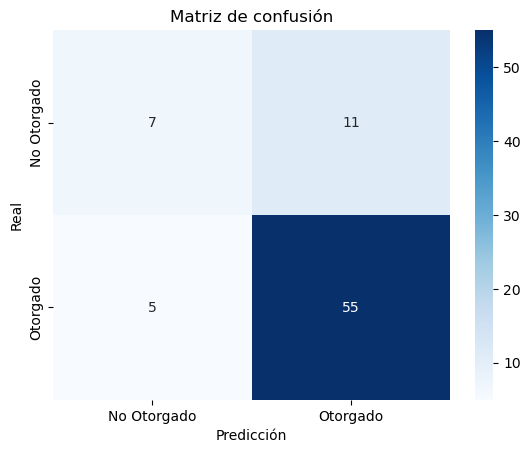

In [11]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt 

MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

#y_pred=y_pred.flatten()# de 2D a 1D

accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
print('Accuracy: ' + accuracyModeloBase) 

precision=precision_score(y_testBinario, y_predBinario)
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_testBinario, y_predBinario)
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_testBinario, y_predBinario)
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()  
print('Verdaderos negativos: ',tn,' Falsos positivos: ',fp,' Falsos negativos: ',fn,' Verdaderos positivos: ',tp)

from sklearn.metrics import confusion_matrix  
labels = ['No Otorgado', 'Otorgado']
cm = confusion_matrix(y_testBinario, y_predBinario)  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicción');ax.set_ylabel('Real'); 
ax.set_title('Matriz de confusión'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

<h3>5. Conclusiones  </h3>

<ul>
    <li> </li>
    <li> </li>
    <li>En la matriz de confusión me salio como resultado Verdaderos postivios=55, Falsos positivos=11, Verdaderos negativos=7 y Falsos negativos=7. Con estos datos calculamos la precisión <img src="https://i.ibb.co/dmhLQw9/precision.png" width="20%"> <b>Precisión=55/(55+11)=0.8333</b> con este resultado vemos que la precisión esta bien con respecto a los positivos ya que es un rango de 0 y 1 y vemos que esta cercano a 1.
        
        
Calculamos el Recall (Exhaustividad) <img src="https://i.ibb.co/nf1HVSv/exahus.png" width="20%"> <b>Recall= 55/55+5=0.9166</b> El modelo ha demostrado una capacidad destacada para identificar correctamente los casos de riesgo de mortalidad por hepatitis. Un recall de 0.9166 significa que el modelo ha capturado aproximadamente el 91.66% de los casos de riesgo real, lo cual está bastante bien sin embargo nuestro objetivo es llegar a 1 así que se puede mejorar.
    
Calculamos F1-Score <img src="https://i.ibb.co/Jc6d88x/f1.png" width="20%"> <b>F1= 2*(0.8333*0.9166/0.8333+0.9166)=0.8730 </b>indica un buen equilibrio entre precisión y recall en la detección de riesgo de mortalidad por hepatitis. Esto significa que el modelo tiene una alta capacidad para identificar correctamente los casos de riesgo y minimizar los falsos positivos y falsos negativos.  
    
Calculamos Accuracy (Exactitud) <img src="https://i.ibb.co/MPD3KKG/acuac.png" width="25%"> <b>Accuracy= 0.7948</b>  esto indica que el modelo clasifica correctamente aproximadamente el 79.48% de los casos, se requiere un análisis más exhaustivo para evaluar su rendimiento y poder mejorarlo.</li>
    <br>
<li><b>El modelo de detección de riesgo de mortalidad por hepatitis muestra un desempeño prometedor en base a las métricas evaluadas. La precisión obtenida de 0.8333 indica que el modelo tiene una buena capacidad para identificar correctamente los casos positivos, mientras que el recall de 0.9166 muestra que puede capturar una gran proporción de los casos reales de riesgo. El F1-score de 0.8730 confirma un equilibrio satisfactorio entre la precisión y el recall. Sin embargo, el accuracy de 0.7948 indica que el modelo puede mejorar su capacidad para clasificar correctamente todos los casos. Se puede considerar realizar análisis más detallados y validación clínica para evaluar el rendimiento del modelo en un contexto médico real y buscar oportunidades de mejora.</b> </li>
</ul>